# <font color = 'Red'>Case Study - Bank Loan </font>

### Step 1 : Setup
- Calling the required libraries
- Reading the required files
- Basic inspection of files

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the application file using 'read_csv'.

appl = pd.read_csv('application_data.csv')

In [4]:
# basic inspection of DF
appl.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# basic inspection of DF
appl.shape

(307511, 122)

In [6]:
# checking different columns and their datatype
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Read the previous application file using 'read_csv'.
prev_appl = pd.read_csv('previous_application.csv')

In [8]:
# basic inspection of DF
prev_appl.shape

(1670214, 37)

In [9]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Step 2 : Merging the two datasets
- The current loan application & historic applications. 
- Merging using inner join to ensure only the applications present in both the dataframes are analysed.
- Perform basic inspection of the resultant DataFrame.

In [10]:
inp0=appl.merge(prev_appl, on='SK_ID_CURR', how='inner')

In [11]:
# basic inspection of DF
inp0.shape

(1413701, 158)

In [12]:
# basic inspection of DF
inp0.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 158 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413608 non-null  float64
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64
 11  NAME_TYPE_SUITE_x             1410175 non-null  object 
 12  NAME_INCOME_TYPE           

In [13]:
# basic inspection of DF
pd.set_option('max_columns', None)
inp0.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartmen

In [14]:
#pd.reset_option('max_columns')

### Step 3 : Data Cleanup - 1
- Removal based on percentage of null present in columns
- Removal based on description of column and its signifance for analysis
- Basic inspection of the updated DataFrame
- Handeling of Null
- Finally removing few more columns with low importance for analysis and having high values of Null 

In [15]:
# Figuring the percent of missing data for each column
count_missing = inp0.isna().sum() * 100/len(inp0)
count_missing

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               39.690571
DAYS_LAST_DUE_1ST_VERSION    39.690571
DAYS_LAST_DUE                39.690571
DAYS_TERMINATION             39.690571
NFLAG_INSURED_ON_APPROVAL    39.690571
Length: 158, dtype: float64

In [16]:
# Dropping columns where the missing data is more than 50%
inp0 = inp0.loc[:,count_missing < 50]

In [17]:
# Basic inspection of DF
inp0.shape

(1413701, 120)

In [18]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0690,0.0833,0.0190,0.9722,0.0690,0.0833,0.0198,0.9722,0.0690,0.0833,0.0193,block of flats,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.0345,0.2917,0.0549,0.9851,0.0345,0.2917,0.0554,0.9851,0.0345,0.2917,0.0558,block of flats,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.0345,0.2917,0.0549,0.9851,0.0345,0.2917,0.0554,0.9851,0.0345,0.2917,0.0558,block of flats,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0

In [19]:
inp0.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 120 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413608 non-null  float64
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64
 11  NAME_TYPE_SUITE_x             1410175 non-null  object 
 12  NAME_INCOME_TYPE           

In [20]:
# Checking the percent of missing data for each cells to see if the drop critrion can be enhanced
count_missing = inp0.isna().sum() * 100/len(inp0)

In [21]:
count_missing = count_missing.sort_values(ascending=False)
count_missing.head(30)

ENTRANCES_MEDI                  49.995155
ENTRANCES_MODE                  49.995155
ENTRANCES_AVG                   49.995155
LIVINGAREA_MEDI                 49.826661
LIVINGAREA_AVG                  49.826661
LIVINGAREA_MODE                 49.826661
HOUSETYPE_MODE                  49.810108
FLOORSMAX_MEDI                  49.409882
FLOORSMAX_MODE                  49.409882
FLOORSMAX_AVG                   49.409882
NAME_TYPE_SUITE_y               49.138538
YEARS_BEGINEXPLUATATION_MEDI    48.431882
YEARS_BEGINEXPLUATATION_AVG     48.431882
YEARS_BEGINEXPLUATATION_MODE    48.431882
TOTALAREA_MODE                  47.926754
EMERGENCYSTATE_MODE             47.064478
DAYS_TERMINATION                39.690571
NFLAG_INSURED_ON_APPROVAL       39.690571
DAYS_FIRST_DRAWING              39.690571
DAYS_FIRST_DUE                  39.690571
DAYS_LAST_DUE_1ST_VERSION       39.690571
DAYS_LAST_DUE                   39.690571
OCCUPATION_TYPE                 32.367523
AMT_GOODS_PRICE_y               22

In [22]:
# Based on the description of coulmns, few more fields can be dropped. It is noticed that coulmns with missing data > 39% 
# are also of less significance and hence dropping them.

count_missing = inp0.isna().sum() * 100/len(inp0)
inp0 = inp0.loc[:,count_missing < 39]

In [23]:
# Basic inspection of the DF
inp0.shape

(1413701, 98)

In [24]:
inp0.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 98 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413608 non-null  float64
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64
 11  NAME_TYPE_SUITE_x             1410175 non-null  object 
 12  NAME_INCOME_TYPE            

In [25]:
# SK_ID_CURR and SK_ID_PREV are only the ID's and hence not significant for analysis. Dropping them.
inp0.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1, inplace=True)

In [26]:
inp0.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary /

#### There are multiple columns related to various flags. Let's examine to see if they are of significance.

In [27]:
inp0.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.662924
Y    0.337076
Name: FLAG_OWN_CAR, dtype: float64

In [28]:
inp0.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.724405
N    0.275595
Name: FLAG_OWN_REALTY, dtype: float64

In [29]:
inp0.FLAG_MOBIL.value_counts(normalize=True)

1    1.0
Name: FLAG_MOBIL, dtype: float64

In [30]:
inp0.FLAG_EMP_PHONE.value_counts(normalize=True)

1    0.806439
0    0.193561
Name: FLAG_EMP_PHONE, dtype: float64

In [31]:
inp0.FLAG_WORK_PHONE.value_counts(normalize=True)

0    0.817742
1    0.182258
Name: FLAG_WORK_PHONE, dtype: float64

In [32]:
inp0.FLAG_CONT_MOBILE.value_counts(normalize=True)

1    0.999245
0    0.000755
Name: FLAG_CONT_MOBILE, dtype: float64

In [33]:
inp0.FLAG_PHONE.value_counts(normalize=True)

0    0.717125
1    0.282875
Name: FLAG_PHONE, dtype: float64

In [34]:
inp0.FLAG_EMAIL.value_counts(normalize=True)

0    0.927571
1    0.072429
Name: FLAG_EMAIL, dtype: float64

#### There are multiple flags in the system. These flags are either having only one value or else the imbalance in the two values is very high making them inappropiate for analysis. Dropping all the flag related columns except 'FLAG_OWN_CAR' as here the impalance is slightly less

In [35]:
#cols=[4, 20, 21, 22, 23, 24, 25, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 79, 80]
cols = ['FLAG_OWN_REALTY',
        'FLAG_MOBIL',
        'FLAG_EMP_PHONE',
        'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE',
        'FLAG_PHONE',
        'FLAG_EMAIL',
        'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4',
        'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6',
        'FLAG_DOCUMENT_7',
        'FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_9',
        'FLAG_DOCUMENT_10',
        'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12',
        'FLAG_DOCUMENT_13',
        'FLAG_DOCUMENT_14',
        'FLAG_DOCUMENT_15',
        'FLAG_DOCUMENT_16',
        'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18',
        'FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21',
        'FLAG_LAST_APPL_PER_CONTRACT',
        'NFLAG_LAST_APPL_IN_DAY']
inp0.drop(cols, axis=1, inplace=True)

In [36]:
# Basic inspection of the DF after dropping the columns
inp0.shape

(1413701, 67)

In [37]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 67 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   TARGET                        1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 2   CODE_GENDER                   1413701 non-null  object 
 3   FLAG_OWN_CAR                  1413701 non-null  object 
 4   CNT_CHILDREN                  1413701 non-null  int64  
 5   AMT_INCOME_TOTAL              1413701 non-null  float64
 6   AMT_CREDIT_x                  1413701 non-null  float64
 7   AMT_ANNUITY_x                 1413608 non-null  float64
 8   AMT_GOODS_PRICE_x             1412493 non-null  float64
 9   NAME_TYPE_SUITE_x             1410175 non-null  object 
 10  NAME_INCOME_TYPE              1413701 non-null  object 
 11  NAME_EDUCATION_TYPE           1413701 non-null  object 
 12  NAME_FAMILY_STATUS          

#### Handeling the Nulls
- Figure out all the columns with Nulls
- Get count of nulls in each column
- If the count is less than 5000; drop the rows

In [38]:
# Define 2 lists to hold the column number & count of nulls in that column number
column_nbr = []
null_nbr = []

for i in range (0, 67):
    if inp0.iloc[:,i].isna().sum() > 0:
        column_nbr.append(i)
        null_nbr.append(inp0.iloc[:,i].isna().sum())

In [39]:
# List of columns having Null
column_nbr

[7,
 8,
 9,
 19,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 48,
 49,
 64,
 66]

In [40]:
# Number of Null cells for the column
null_nbr

[93,
 1208,
 3526,
 457580,
 1821,
 241842,
 3146,
 3146,
 3146,
 3146,
 163627,
 163627,
 163627,
 163627,
 163627,
 163627,
 307218,
 1,
 319525,
 307213,
 313]

In [41]:
inp0.shape

(1413701, 67)

In [42]:
# Identifying all the columns in the null_nbr list with Nulls less than 5000 and removing such records
for i in range(len(null_nbr)):
    if null_nbr[i] < 5000:
        a = column_nbr[i]
        inp0 = inp0[~inp0.iloc[:,a].isna()]

In [43]:
inp0.shape

(1404812, 67)

In [44]:
# Reverifying the 2 lists to for the column number & count of nulls in that column number
column_nbr = []
null_nbr = []

for i in range (0, 67):
    if inp0.iloc[:,i].isna().sum() > 0:
        column_nbr.append(i)
        null_nbr.append(inp0.iloc[:,i].isna().sum())

In [45]:
column_nbr

[19, 33, 39, 40, 41, 42, 43, 44, 46, 49, 64]

In [46]:
null_nbr

[454694,
 240105,
 162490,
 162490,
 162490,
 162490,
 162490,
 162490,
 305163,
 317469,
 305158]

In [47]:
# Remaining are the Columns with considerable high number of Nulls.
# Analyzing them one-by-one
for i in range(len(column_nbr)):
    a = column_nbr[i]
    print(inp0.iloc[:,a].value_counts())
    print('**********')

Laborers                 249831
Sales staff              150334
Core staff               117435
Managers                  94425
Drivers                   83560
High skill tech staff     48195
Accountants               41659
Medicine staff            39734
Security staff            31482
Cooking staff             28516
Cleaning staff            24178
Private service staff     12174
Low-skill Laborers         9284
Waiters/barmen staff       6086
Secretaries                5716
Realty agents              3524
HR staff                   2306
IT staff                   1679
Name: OCCUPATION_TYPE, dtype: int64
**********
0.746300    5688
0.670652    5636
0.554947    5486
0.694093    5169
0.595456    5131
            ... 
0.024227       1
0.011346       1
0.026921       1
0.024919       1
0.872456       1
Name: EXT_SOURCE_3, Length: 810, dtype: int64
**********
0.0    1234901
1.0       7155
2.0        236
3.0         26
4.0          4
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
**********


In [48]:
# Based on the above analysis; except for OCCUPATION_TYPE, all other columns are numeric and imputing any value in so many 
# cells of these columns may produce incorrect result. Dropping all such columns.
inp0.drop(['EXT_SOURCE_3',
           'AMT_REQ_CREDIT_BUREAU_HOUR',
           'AMT_REQ_CREDIT_BUREAU_DAY',
           'AMT_REQ_CREDIT_BUREAU_WEEK',
           'AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT',
           'AMT_REQ_CREDIT_BUREAU_YEAR',
           'AMT_ANNUITY_y',
           'AMT_GOODS_PRICE_y',
           'CNT_PAYMENT'], axis=1, inplace=True)

In [49]:
inp0.shape

(1404812, 57)

In [50]:
# Imputing 'Unknown' in Null cells of column OCCUPATION_TYPE
inp0.OCCUPATION_TYPE.fillna('Unknown', inplace=True)

In [51]:
inp0.shape

(1404812, 57)

In [52]:
inp0.isna().sum()

TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START_x       0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_W

In [53]:
# Changing TARGET column to Object
inp0.TARGET = inp0.TARGET.astype(object)

In [54]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404812 entries, 0 to 1413700
Data columns (total 57 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   TARGET                        1404812 non-null  object 
 1   NAME_CONTRACT_TYPE_x          1404812 non-null  object 
 2   CODE_GENDER                   1404812 non-null  object 
 3   FLAG_OWN_CAR                  1404812 non-null  object 
 4   CNT_CHILDREN                  1404812 non-null  int64  
 5   AMT_INCOME_TOTAL              1404812 non-null  float64
 6   AMT_CREDIT_x                  1404812 non-null  float64
 7   AMT_ANNUITY_x                 1404812 non-null  float64
 8   AMT_GOODS_PRICE_x             1404812 non-null  float64
 9   NAME_TYPE_SUITE_x             1404812 non-null  object 
 10  NAME_INCOME_TYPE              1404812 non-null  object 
 11  NAME_EDUCATION_TYPE           1404812 non-null  object 
 12  NAME_FAMILY_STATUS          

### Step 4 : Data Cleanup - 2
- Correcting data (based on manual lookup of data)
- Dropping rows associated with Column having null data
- Dropping rows associated with columns having outliers
- Imputing outliers

In [55]:
inp0.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,Cash loans,M,N,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,Consumer loans,179055.0,179055.0,SATURDAY,9,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,Cash loans,900000.0,1035882.0,FRIDAY,12,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,Consumer loans,337500.0,348637.5,SUNDAY,17,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,Consumer loans,68809.5,68053.5,SATURDAY,15,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,Consumer loans,24282.0,20106.0,FRIDAY,5,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest


#### It is noticed that many numeric columns related to days are having negative value of days. Correcting the data.

In [56]:
# Checking the numeric data
# 1. DAYS_BIRTH
inp0.DAYS_BIRTH.value_counts()

-14890    235
-17873    228
-11991    227
-16721    221
-13480    219
         ... 
-7996       1
-7957       1
-7842       1
-25052      1
-7861       1
Name: DAYS_BIRTH, Length: 17445, dtype: int64

In [57]:
# Computing Age from Days_Birth and renaming the column
inp0.rename(columns={'DAYS_BIRTH':'Age'}, inplace=True)

In [58]:
inp0.Age=abs(inp0.Age/365).astype(int)

In [59]:
# Basic inspection of DF
inp0.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,Age,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,Cash loans,M,N,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,Consumer loans,179055.0,179055.0,SATURDAY,9,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,Cash loans,900000.0,1035882.0,FRIDAY,12,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,Consumer loans,337500.0,348637.5,SUNDAY,17,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,Consumer loans,68809.5,68053.5,SATURDAY,15,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,Consumer loans,24282.0,20106.0,FRIDAY,5,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest


In [60]:
# Checking the numeric data
# 2. DAYS_EMPLOYED
inp0.DAYS_EMPLOYED.value_counts()

 365243    271926
-196          633
-199          582
-229          569
-224          566
            ...  
-12794          1
-12119          1
-13269          1
-17546          1
-6013           1
Name: DAYS_EMPLOYED, Length: 12438, dtype: int64

In [61]:
inp0.shape

(1404812, 57)

In [62]:
271926/ 1404812

0.19356753786271758

In [63]:
# A large number of records (19%) seems to have incorrect data in this field as 365243 is very high number of days to be true.
# Since 20% of data can't be deleted; lets further analyze the data against the age of applicant.

In [64]:
inp1 = inp0.loc[:,['Age', 'DAYS_EMPLOYED']]

In [65]:
inp1 = inp1[inp1.DAYS_EMPLOYED == 365243]

In [66]:
inp1.groupby('Age').count()

,DAYS_EMPLOYED
Age,
21,9
22,17
23,56
24,36
25,60
26,103
27,85
28,84
29,86


In [67]:
inp0[(inp0.DAYS_EMPLOYED == 365243)  & (inp0.Age <= 55)]

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,Age,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
33,0,Cash loans,F,N,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55,365243,-7427.0,-3514,Unknown,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,1.0,0.0,1.0,0.0,0.0,Cash loans,0.0,0.0,WEDNESDAY,9,XNA,Refused,-1162,Cash through the bank,LIMIT,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash
34,0,Cash loans,F,N,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55,365243,-7427.0,-3514,Unknown,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,1.0,0.0,1.0,0.0,0.0,Consumer loans,135931.5,134446.5,MONDAY,17,XAP,Approved,-2508,Cash through the bank,XAP,New,Computers,POS,XNA,Country-wide,1371,Consumer electronics,high,POS household with interest
35,0,Cash loans,F,N,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55,365243,-7427.0,-3514,Unknown,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,1.0,0.0,1.0,0.0,0.0,Revolving loans,0.0,180000.0,SATURDAY,10,XAP,Approved,-2279,XNA,XAP,Repeater,XNA,Cards,x-sell,Contact center,0,XNA,XNA,Card X-Sell
36,0,Cash loans,F,N,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55,365243,-7427.0,-3514,Unknown,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,1.0,0.0,1.0,0.0,0.0,Cash loans,675000.0,732915.0,THURSDAY,11,XNA,Approved,-1189,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
43,0,Cash loans,F,N,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,55,365243,-5246.0,-2512,Unknown,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.0,0.0,0.0,0.0,-2396.0,Consumer loans,68850.0,67077.0,WEDNESDAY,8,XAP,Approved,-2396,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,110,Furniture,middle,POS industry with interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413348,1,Cash loans,M,N,0,50400.000,113760.0,7731.0,90000.0,Unaccompanied,Pensioner,Lower secondary,Single / not married,Municipal apartment,0.031329,29,365243,-4074.0,-2309,Unknown,1.0,2,2,WEDNESDAY,7,0,0,0,0,0,0,XNA,0.182723,0.0,0.0,0.0,0.0,-170.0,Cash loans,450000.0,533160.0,TUESDAY,7,XNA,Refused,-183,Cash through the bank,HC,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
1413349,1,Cash loans,M,N,0,50400.000,113760.0,7731.0,90000.0,Unaccompanied,Pensioner,Lower secondary,Single / not married,Municipal apartment,0.031329,29,365243,-4074.0,-2309,Unknown,1.0,2,2,WEDNESDAY,7,0,0,0,0,0,0,XNA,0.182723,0.0,0.0,0.0,0.0,-170.0,Cash lo

In [68]:
# A large number of records (19%) seems to have incorrect data in this field as 365243 is very high number of days to be true.
# Since 20% of data can't be deleted; we further analyzed the data against the age of applicant.
# It was noticed that the data ranges throughout the age but applicants below age 55 and days employed 365243 are significantly 
# low and can be dropped. 
inp0 = inp0[~((inp0.DAYS_EMPLOYED == 365243)  & (inp0.Age <= 55))]

In [69]:
# For remaining (age > 55, days employed = 365243) imputing the median
inp0.loc[inp0.DAYS_EMPLOYED == 365243, 'DAYS_EMPLOYED'] = inp0.DAYS_EMPLOYED.median()

In [70]:
inp0.DAYS_EMPLOYED.value_counts()

-1355     228033
-196         633
-199         582
-229         569
-224         566
           ...  
-12794         1
-12119         1
-13269         1
-17546         1
-6013          1
Name: DAYS_EMPLOYED, Length: 12437, dtype: int64

In [71]:
inp0.shape

(1360673, 57)

In [72]:
# Changing the DAYS_EMPLOYED to Months_Employed and saving the absolute value
inp0.rename(columns={'DAYS_EMPLOYED':'Months_Employed'}, inplace=True)
inp0.Months_Employed=abs(inp0.Months_Employed/30.417).round(0).astype(int)

In [73]:
inp0.Months_Employed.head()

0    21
1    39
2    39
3    39
4     7
Name: Months_Employed, dtype: int32

In [74]:
# Checking the numeric data
# 3. DAYS_REGISTRATION
inp0.DAYS_REGISTRATION.value_counts()

-1.0        453
-6.0        437
-5.0        426
-7.0        408
-2.0        402
           ... 
-17077.0      1
-13938.0      1
-15014.0      1
-15482.0      1
-14709.0      1
Name: DAYS_REGISTRATION, Length: 15574, dtype: int64

In [75]:
# Changing data type as integer and computing absolute value
inp0.DAYS_REGISTRATION=abs(inp0.DAYS_REGISTRATION).astype(int)

In [76]:
inp0.DAYS_REGISTRATION.head()

0    3648
1    1186
2    1186
3    1186
4    4260
Name: DAYS_REGISTRATION, dtype: int32

In [77]:
# Checking the numeric data
# 4. DAYS_ID_PUBLISH
inp0.DAYS_ID_PUBLISH.value_counts()

-4053    836
-4047    823
-4095    817
-4130    806
-4383    788
        ... 
-6131      1
-6219      1
-5904      1
-6073      1
-6116      1
Name: DAYS_ID_PUBLISH, Length: 6159, dtype: int64

In [78]:
# replacing with absolute value
inp0.DAYS_ID_PUBLISH=abs(inp0.DAYS_ID_PUBLISH)

In [79]:
# Checking the numeric data
# 5. DAYS_LAST_PHONE_CHANGE
inp0.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       127278
-1.0         5382
-2.0         2993
-3.0         2268
-4.0         1854
            ...  
-3575.0         1
-3580.0         1
-3737.0         1
-3581.0         1
-3808.0         1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3699, dtype: int64

In [80]:
# Changing data type as integer and computing absolute value
inp0.DAYS_LAST_PHONE_CHANGE=abs(inp0.DAYS_LAST_PHONE_CHANGE).astype(int)

In [81]:
inp0.DAYS_LAST_PHONE_CHANGE.head()

0    1134
1     828
2     828
3     828
4     815
Name: DAYS_LAST_PHONE_CHANGE, dtype: int32

In [82]:
# Checking the numeric data
# 6. DAYS_DECISION
inp0.DAYS_DECISION.value_counts()

-245     2104
-238     2075
-210     2024
-224     1985
-252     1984
         ... 
-2893     129
-2921     128
-2829     127
-2902      99
-1          1
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [83]:
inp0.DAYS_DECISION=abs(inp0.DAYS_DECISION).astype(int)

In [84]:
# Basic inspection of DF
inp0.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,Age,Months_Employed,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,Cash loans,M,N,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,21,3648,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134,Consumer loans,179055.0,179055.0,SATURDAY,9,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,39,1186,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828,Cash loans,900000.0,1035882.0,FRIDAY,12,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,39,1186,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828,Consumer loans,337500.0,348637.5,SUNDAY,17,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,39,1186,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828,Consumer loans,68809.5,68053.5,SATURDAY,15,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,7,4260,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,815,Consumer loans,24282.0,20106.0,FRIDAY,5,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest


In [85]:
# The following columns have outliers impacting the analysis. Checking & dropping them.
# DEF_30_CNT_SOCIAL_CIRCLE
# DEF_60_CNT_SOCIAL_CIRCLE
# OBS_30_CNT_SOCIAL_CIRCLE
# OBS_60_CNT_SOCIAL_CIRCLE

In [86]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     1195164
1.0      132026
2.0       25194
3.0        6349
4.0        1579
5.0         286
6.0          66
7.0           4
34.0          3
8.0           2
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [87]:
inp0 = inp0[~(inp0.DEF_30_CNT_SOCIAL_CIRCLE == 34)]

In [88]:
inp0.shape

(1360670, 57)

In [89]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0    1238556
1.0     102512
2.0      15407
3.0       3170
4.0        898
5.0        109
6.0         14
7.0          4
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [90]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     706390
1.0     212989
2.0     133621
3.0      93094
4.0      65575
5.0      45446
6.0      31926
7.0      22277
8.0      14854
9.0      10790
10.0      7380
11.0      4605
12.0      3924
13.0      2367
14.0      1520
15.0      1062
16.0       831
17.0       632
19.0       332
18.0       274
20.0       204
21.0       160
22.0       153
25.0        76
23.0        55
24.0        42
27.0        40
29.0        19
26.0        15
30.0        13
47.0         4
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [91]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     709539
1.0     213577
2.0     133574
3.0      92519
4.0      64875
5.0      44947
6.0      31491
7.0      22154
8.0      14367
9.0      10560
10.0      7233
11.0      4590
12.0      3664
13.0      2340
14.0      1423
15.0      1046
16.0       865
17.0       551
18.0       304
19.0       301
20.0       225
22.0       138
21.0       134
25.0        65
24.0        61
23.0        44
27.0        40
29.0        27
26.0         7
30.0         5
47.0         4
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

### Step 5 : Data Cleanup 
- Cleanup of non Integer data

In [92]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360670 entries, 0 to 1413700
Data columns (total 57 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   TARGET                        1360670 non-null  object 
 1   NAME_CONTRACT_TYPE_x          1360670 non-null  object 
 2   CODE_GENDER                   1360670 non-null  object 
 3   FLAG_OWN_CAR                  1360670 non-null  object 
 4   CNT_CHILDREN                  1360670 non-null  int64  
 5   AMT_INCOME_TOTAL              1360670 non-null  float64
 6   AMT_CREDIT_x                  1360670 non-null  float64
 7   AMT_ANNUITY_x                 1360670 non-null  float64
 8   AMT_GOODS_PRICE_x             1360670 non-null  float64
 9   NAME_TYPE_SUITE_x             1360670 non-null  object 
 10  NAME_INCOME_TYPE              1360670 non-null  object 
 11  NAME_EDUCATION_TYPE           1360670 non-null  object 
 12  NAME_FAMILY_STATUS          

In [93]:
# Identifying all the Numeric columns
num = []
obj = []
for i in range (0,57):
    if inp0.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)  

In [94]:
len(obj)

26

In [95]:
col_names = inp0.columns

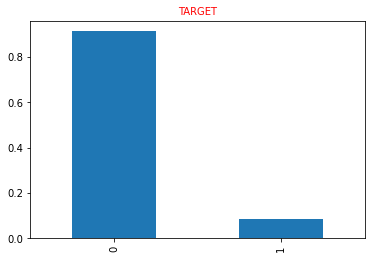

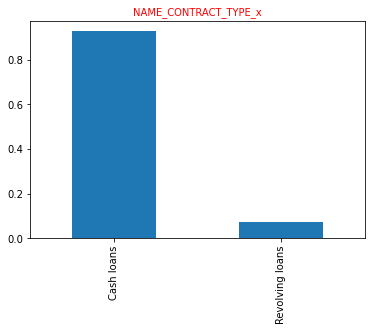

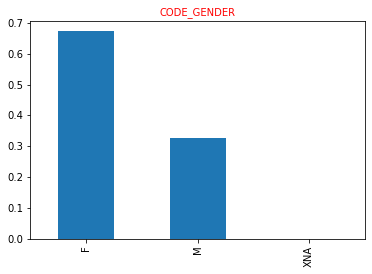

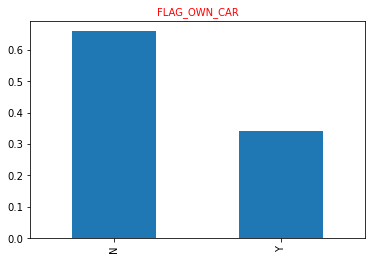

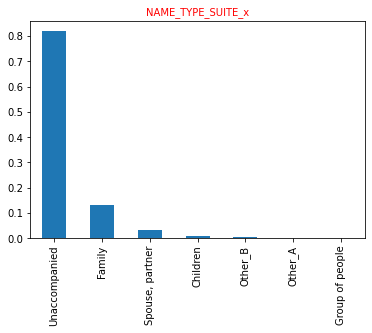

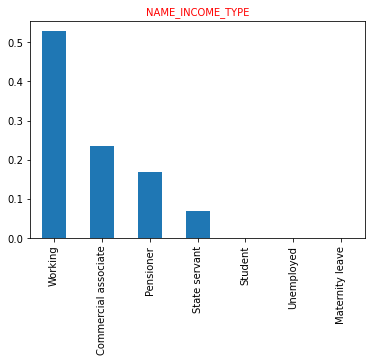

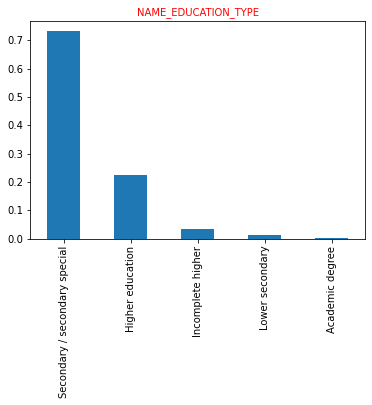

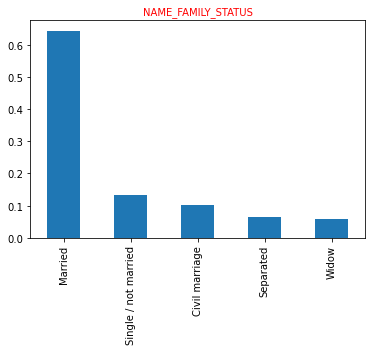

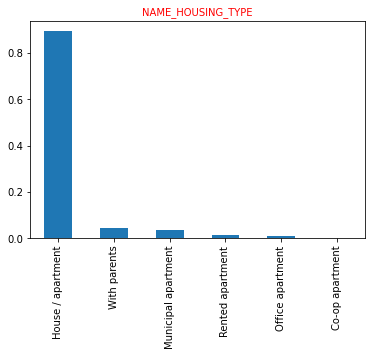

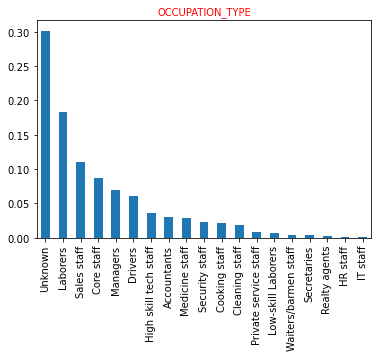

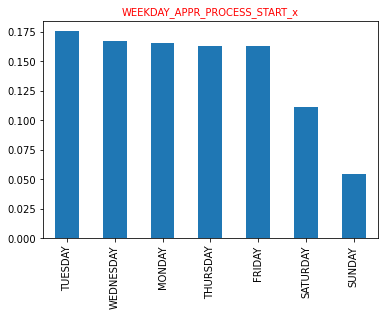

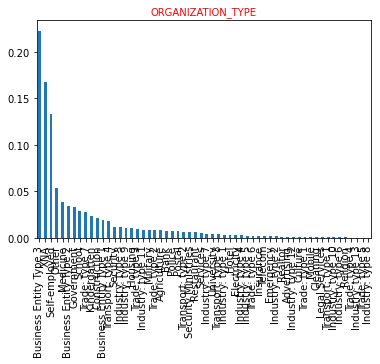

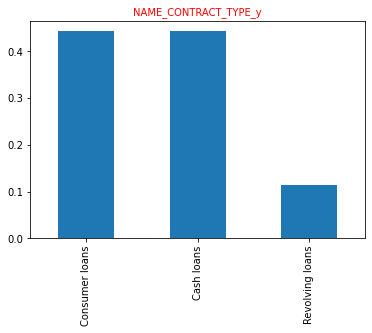

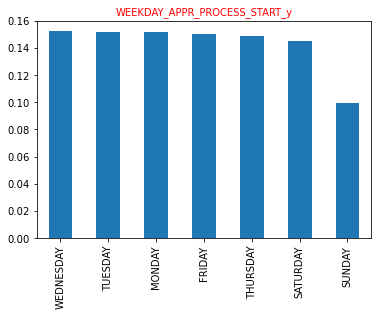

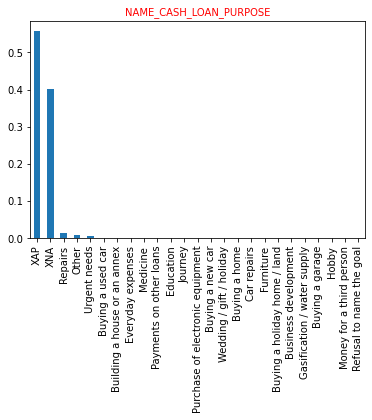

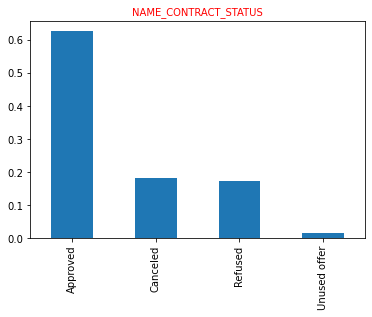

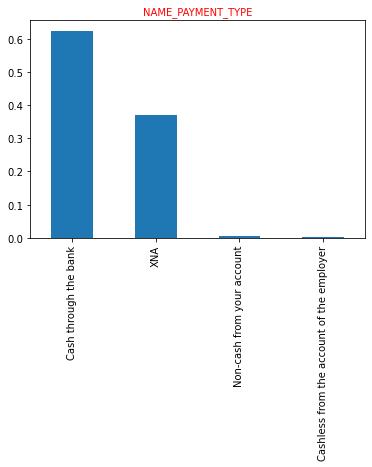

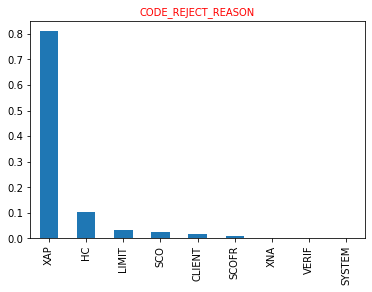

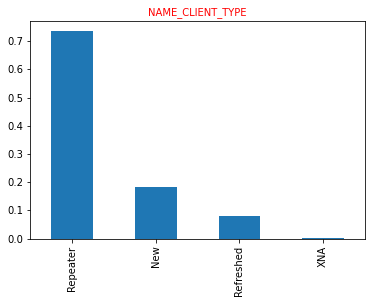

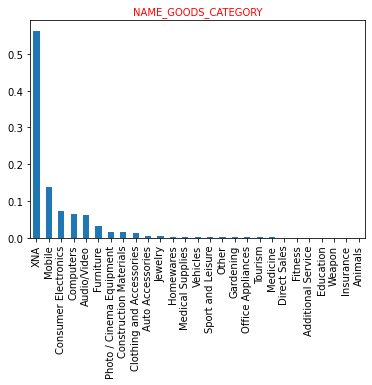

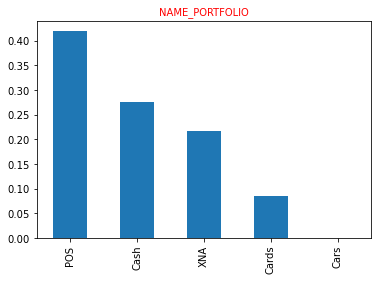

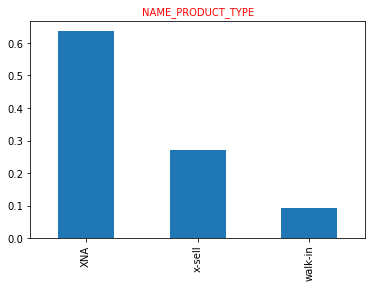

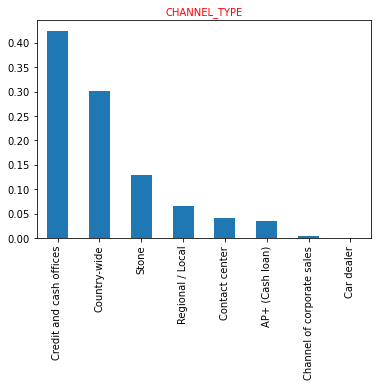

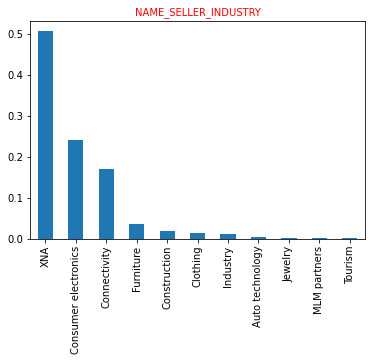

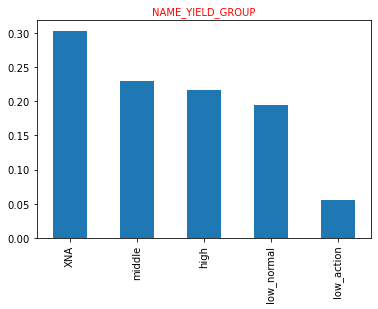

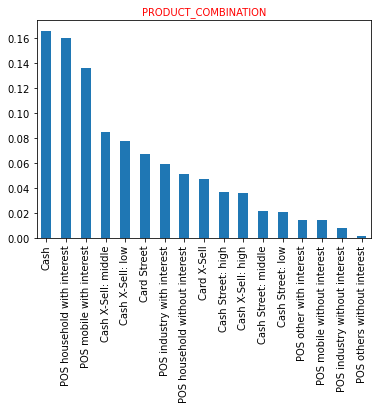

In [96]:
for i in range(len(obj)):
    a = obj[i]
    plt.title(col_names[a], fontsize= 10, color = 'Red', fontweight = 100)
    inp0.iloc[:,a].value_counts(normalize=True).plot.bar()
    plt.show()

#### Based on the above map, the following variables have missing values
- CODE_GENDER
- NAME_TYPE_SUITE_x
- ORGANIZATION_TYPE
- NAME_CASH_LOAN_PURPOSE
- NAME_PAYMENT_TYPE
- CODE_REJECT_REASON
- NAME_CLIENT_TYPE
- NAME_GOODS_CATEGORY
- NAME_PORTFOLIO
- NAME_PRODUCT_TYPE
- NAME_SELLER_INDUSTRY
- NAME_YIELD_GROUP

- Most of the missing data here is marked as 'XNA', 'XAP'. Hence, leaving that AS-IS as Nulls are already handled and while doing analysis of these fields, these values will be considered as Unknown.
- Variables where maximum value is either 'Unknown', or 'XNA' or 'XAP' will be no longer analysed since majority data for those columns are missing and hence analysis may lead to incorrect inference.
- For CODE_GENDER a very low percent of data is unknown. Dropping such rows.

In [97]:
# Get the count of XNA's in each column
for i in range(len(obj)):
    a = obj[i]
    print (inp0.iloc[:,a].value_counts())
    print ('***************************')

0    1242281
1     118389
Name: TARGET, dtype: int64
***************************
Cash loans         1261207
Revolving loans      99463
Name: NAME_CONTRACT_TYPE_x, dtype: int64
***************************
F      914742
M      445873
XNA        55
Name: CODE_GENDER, dtype: int64
***************************
N    897109
Y    463561
Name: FLAG_OWN_CAR, dtype: int64
***************************
Unaccompanied      1114733
Family              176850
Spouse, partner      45312
Children             13188
Other_B               6485
Other_A               2943
Group of people       1159
Name: NAME_TYPE_SUITE_x, dtype: int64
***************************
Working                 719548
Commercial associate    319373
Pensioner               227837
State servant            93849
Student                     24
Unemployed                  23
Maternity leave             16
Name: NAME_INCOME_TYPE, dtype: int64
***************************
Secondary / secondary special    995124
Higher education                

XNA                     687788
Consumer electronics    328920
Connectivity            230510
Furniture                46816
Construction             24208
Clothing                 19254
Industry                 15948
Auto technology           3962
Jewelry                   2035
MLM partners               873
Tourism                    356
Name: NAME_SELLER_INDUSTRY, dtype: int64
***************************
XNA           412965
middle        312336
high          295211
low_normal    264331
low_action     75827
Name: NAME_YIELD_GROUP, dtype: int64
***************************
Cash                              225771
POS household with interest       217779
POS mobile with interest          184967
Cash X-Sell: middle               114855
Cash X-Sell: low                  105683
Card Street                        91460
POS industry with interest         79916
POS household without interest     69053
Card X-Sell                        64141
Cash Street: high                  49815
Cash X-Sel

In [98]:
inp0 = inp0[~(inp0.CODE_GENDER == 'XNA')]

In [99]:
inp0.shape

(1360615, 57)

### Step 5 : Handeling Outliers
- Plotting Box Plot for all the numeric variables to identify the outliers

In [100]:
inp0.shape

(1360615, 57)

In [101]:
inp0.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,Age,Months_Employed,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,DAYS_DECISION,SELLERPLACE_AREA
count,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06,1.360615e+06
mean,4.120828e-01,1.738663e+05,5.878084e+05,2.709846e+04,5.276616e+05,2.075283e-02,4.400944e+01,7.479197e+01,4.980462e+03,3.043842e+03,2.158990e+00,2.059006e+00,2.036999e+00,1.199629e+01,1.227386e-02,4.531774e-02,3.711851e-02,7.476252e-02,2.292213e-01,1.796188e-01,5.115300e-01,1.546767e+00,1.540068e-01,1.528913e+00,1.080261e-01,1.085870e+03,1.752840e+05,1.963842e+05,1.249475e+01,8.810327e+02,3.135542e+02
std,7.213699e-01,2.016950e+05,3.846840e+05,1.396581e+04,3.530250e+05,1.330604e-02,1.198442e+01,7.073589e+01,3.543639e+03,1.517366e+03,9.047034e-01,4.956605e-01,4.885407e-01,3.236046e+00,1.101055e-01,2.080002e-01,1.890522e-01,2.630079e-01,4.203321e-01,3.838697e-01,1.910547e-01,2.482042e+00,4.635817e-01,2.461155e+00,3.778018e-01,8.001490e+02,2.939282e+05,3.197771e+05,3.334088e+00,7.834596e+02,7.046878e+03
min,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00
25%,0.000000e+00,1.125000e+05,2.700000e+05,1.686600e+04,2.385000e+05,1.003200e-02,3.400000e+01,3.300000e+01,1.986000e+03,1.771000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.893179e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.970000e+02,1.989000e+04,2.501100e+04,1.000000e+01,2.710000e+02,-1.000000e+00
50%,0.000000e+00,1.575000e+05,5.084955e+05,2.498400e+04,4.500000e+05,1.885000e-02,4.300000e+01,4.500000e+01,4.486000e+03,3.357000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.628056e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.013000e+03,7.092450e+04,8.061975e+04,1.200000e+01,5.840000e+02,4.000000e+00
75%,1.000000e+00,2.115000e+05,8.086500e+05,3.458700e+04,6.795000e+05,2.866300e-02,5.400000e+01,9.500000e+01,7.467000e+03,4.335000e+03,3.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.607359e-01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.684000e+03,1.800000e+05,2.156400e+05,1.500000e+01,1.314000e+03,8.500000e+01
max,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,6.900000e+01,5.890000e+02,2.467200e+04,7.197000e+03,2.000000e+01,3.000000e+00,3.000000e+00,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.549997e-01,4.700000e+01,8.000000e+00,4.700000e+01,7.000000e+00,4.292000e+03,5.850000e+06,4.509688e+06,2.300000e+01,2.922000e+03,4.000000e+06


In [102]:
len(obj)

26

In [103]:
len(num)

31

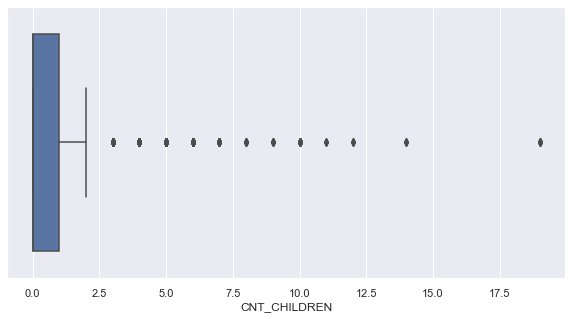

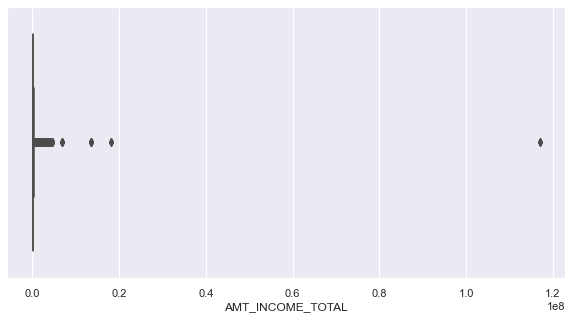

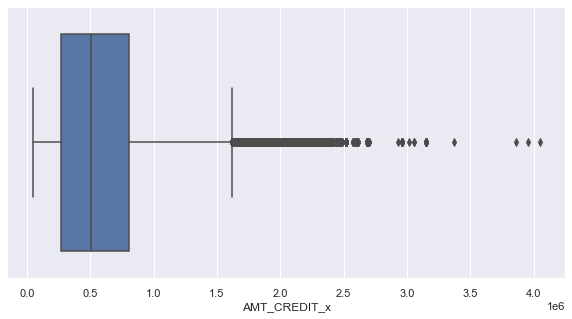

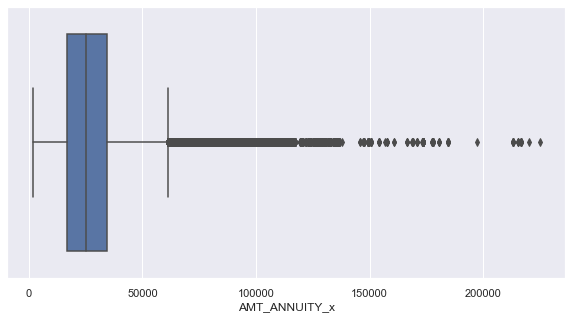

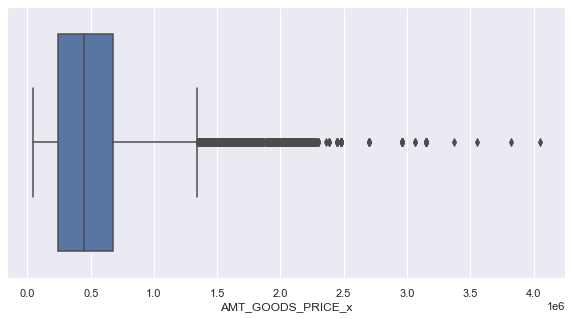

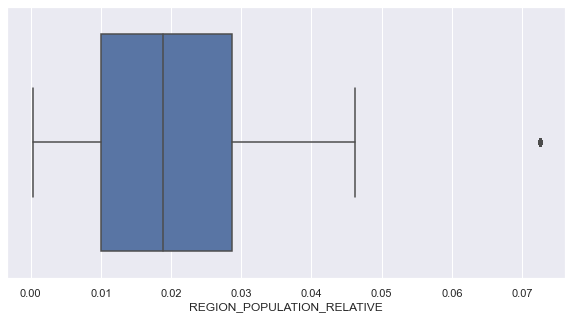

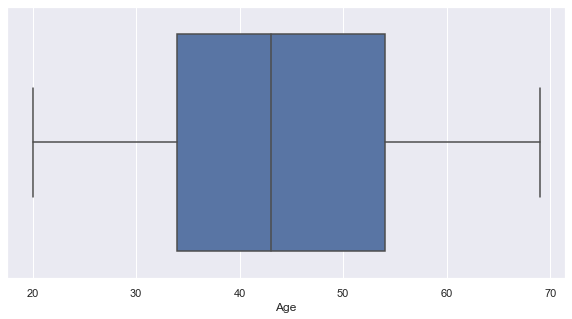

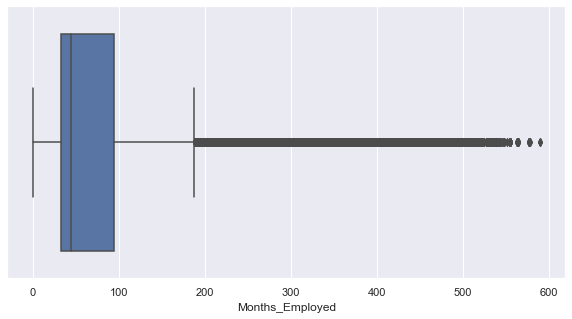

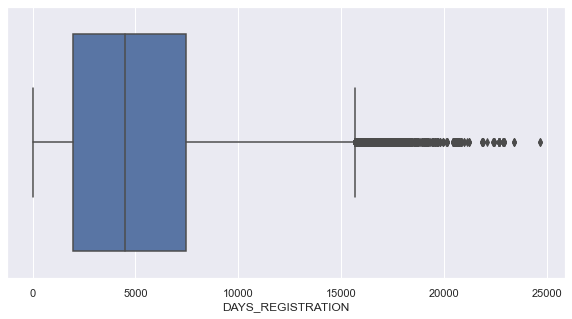

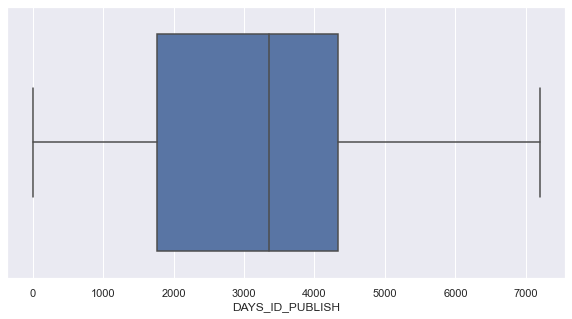

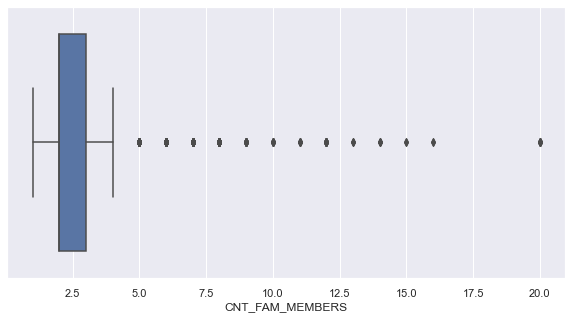

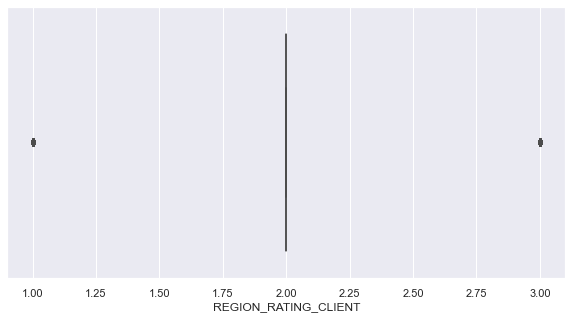

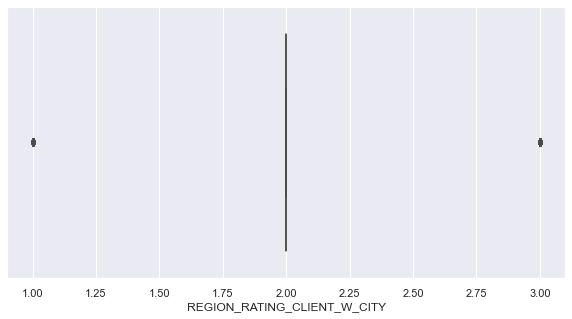

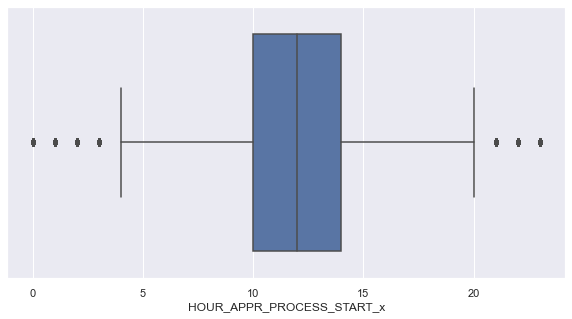

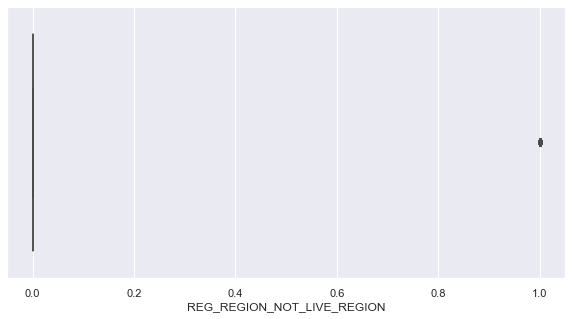

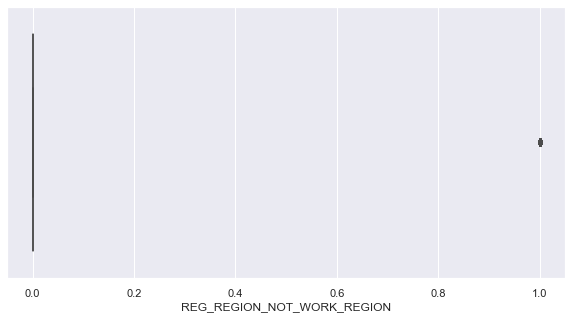

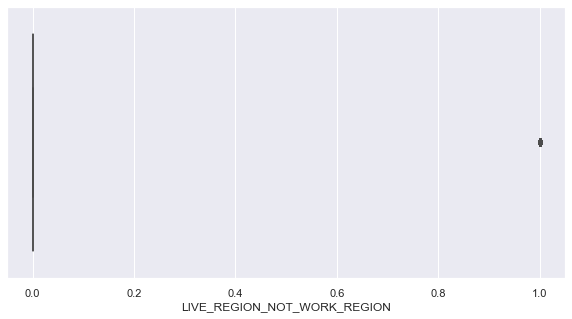

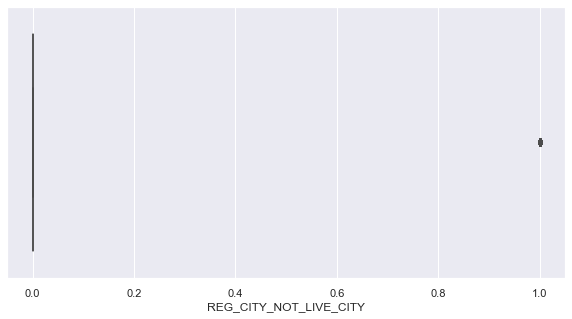

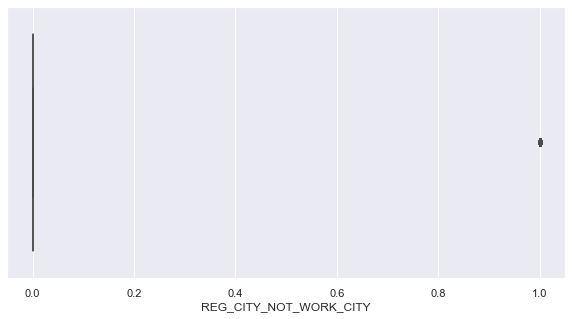

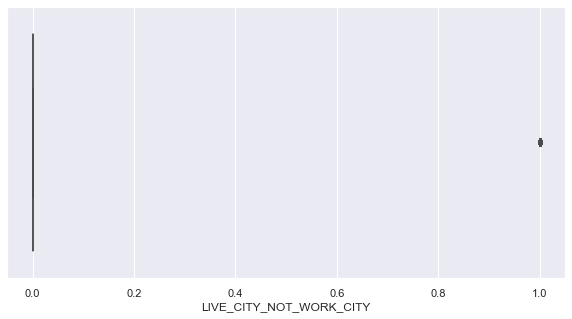

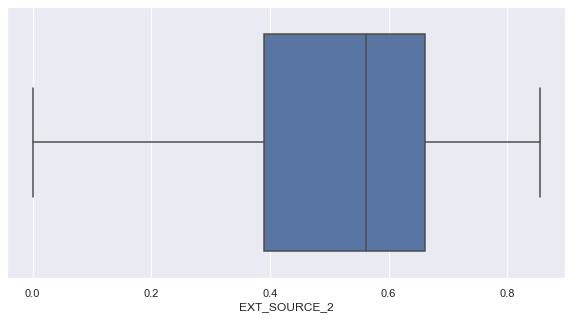

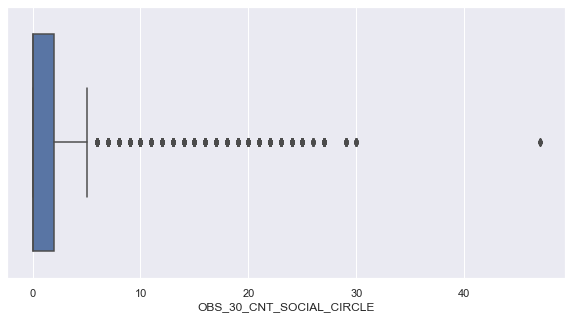

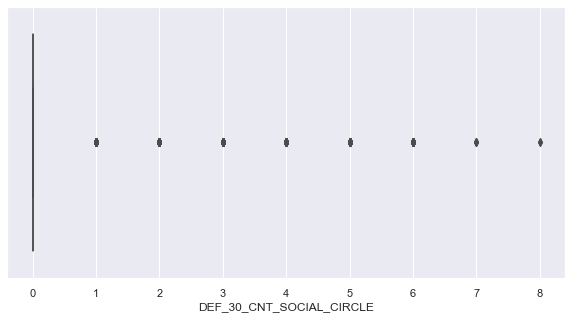

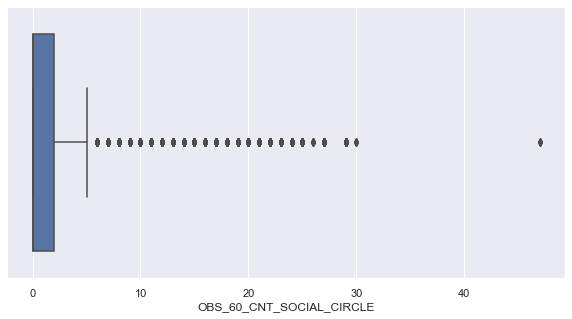

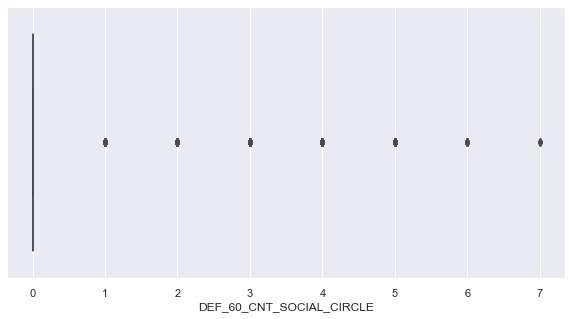

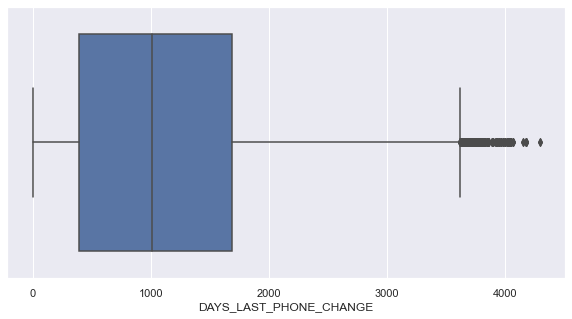

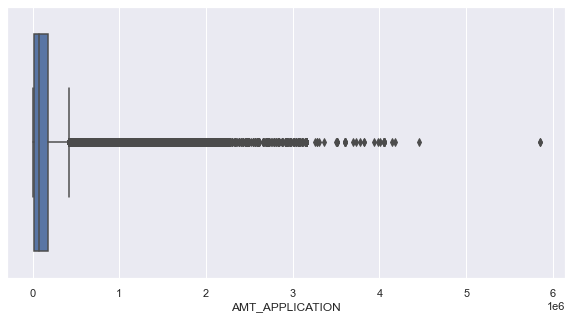

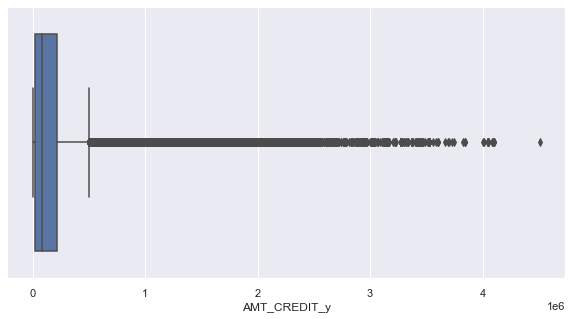

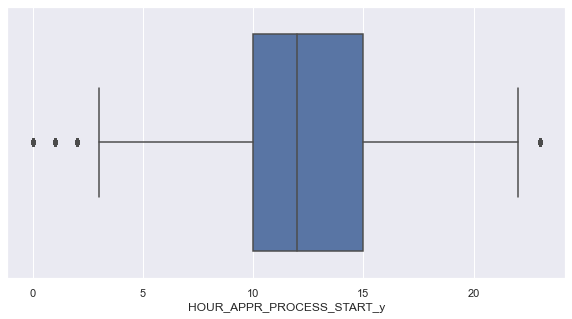

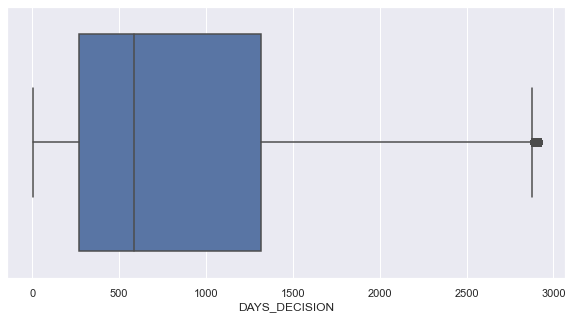

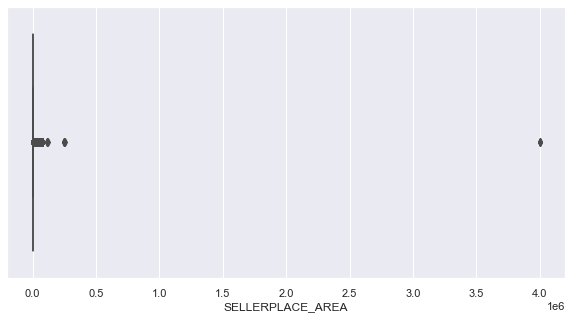

In [104]:
sns.set_theme()
for i in range(len(num)):
    plt.figure(figsize=[10,5])
    a = num[i]
    sns.boxplot(inp0.iloc[:,a])
    plt.show()
    

#### Detailed analysis on individual fields
- Columns like Age, DAYS_ID_PUBLISH have no outliers
- Outliers for fields like Months_Employed, CNT_FAM_MEMBERS can be ignored
- Few other fields seems less significant hence not imputing/ dropping rows related to those fields for now
- The fields that seems significant are analyzed further in below part of the section

In [105]:
# CNT_CHILDREN
# As can be seen there are few records with number of children > 10. Dropping all such records.
inp0 = inp0[inp0.CNT_CHILDREN < 10]

In [106]:
inp0.shape

(1360580, 57)

In [107]:
inp0.groupby(['CNT_CHILDREN','TARGET'])['TARGET'].count()

CNT_CHILDREN  TARGET
0             0         880441
              1          79767
1             0         237396
              1          25441
2             0         107156
              1          11181
3             0          15127
              1           1659
4             0           1603
              1            272
5             0            371
              1             39
6             0             73
              1             20
7             0             19
8             0              8
9             1              7
Name: TARGET, dtype: int64

In [108]:
# Analysis on numeric variable AMT_INCOME_TOTAL
inp0.AMT_INCOME_TOTAL.describe()

count    1.360580e+06
mean     1.738673e+05
std      2.016969e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [109]:
inp0.AMT_INCOME_TOTAL.quantile(.99)

450000.0

In [110]:
# Dropping the data where total income is above 99 percentile to handle outliers
inp0 = inp0[inp0.AMT_INCOME_TOTAL < inp0.AMT_INCOME_TOTAL.quantile(.99)]

In [111]:
inp0.shape

(1338219, 57)

In [112]:
# Analyzing the numeric field AMT_CREDIT_x
# Dropping the outliers (> 2500000)
inp0 = inp0[inp0.AMT_CREDIT_x <= 2500000]

In [113]:
inp0.shape

(1337834, 57)

In [114]:
# Analyzing the numeric field AMT_ANNUITY_x
# Dropping columns with Annuity more than 100000
inp0 = inp0[inp0.AMT_ANNUITY_x <= 100000]

In [115]:
inp0.shape

(1336682, 57)

In [116]:
# Analyzing the numeric field AMT_GOODS_PRICE_x. Dropping rows with value > 2000000
inp0 = inp0[inp0.AMT_GOODS_PRICE_x <= 2000000]

In [117]:
inp0.shape

(1335297, 57)

In [118]:
# Analyzing the numeric field DAYS_REGISTRATION. Dropping rows with value > 20000
inp0 = inp0[inp0.DAYS_REGISTRATION < 20000]

In [119]:
inp0.shape

(1335172, 57)

### Step 6 : Univariate & Bivariate Analysis 
- Univariate analysis of numeric columns using Histogram
- Bivariate analysis of numeric columns against the TARGET Column
- Bivariate analysis of numeric columns against the NAME_CONTRACT_STATUS Column

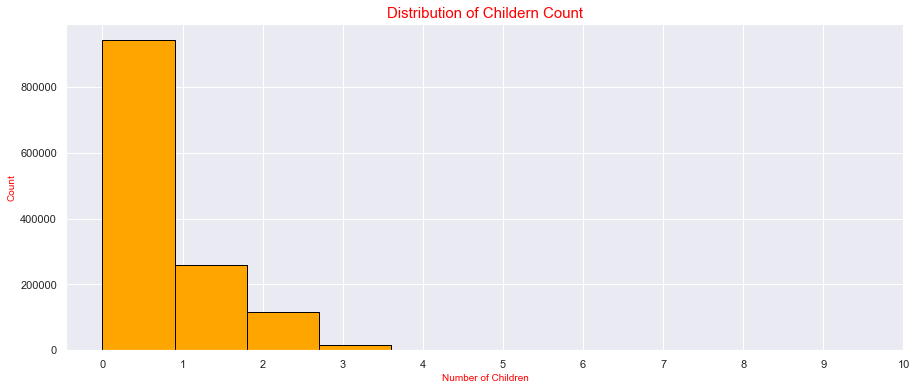

In [120]:
# Let's examine the population distribution for CNT_CHILDREN
plt.figure(figsize=[15,6])
plt.hist(inp0.CNT_CHILDREN, color='Orange', edgecolor='Black')
plt.title('Distribution of Childern Count', fontdict = {'fontsize': 15, 'color': 'Red', 'fontweight' : '500'})
plt.xticks(np.arange(0,11, step=1))
plt.xlabel('Number of Children',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.ylabel('Count',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.show()

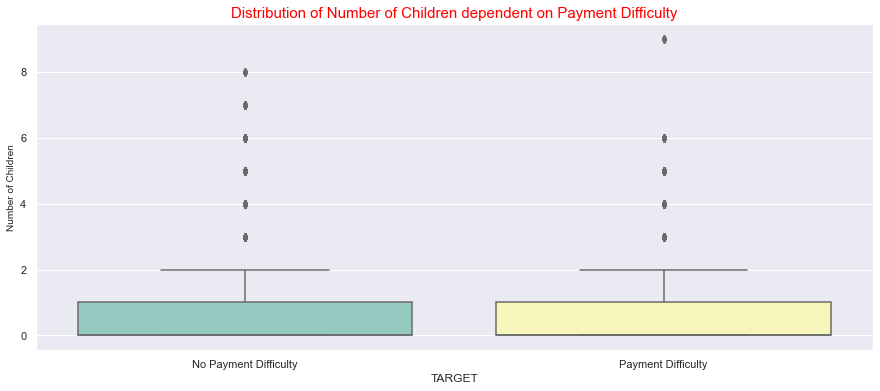

In [121]:
plt.figure(figsize=[15,6])
plt.title('Distribution of Number of Children dependent on Payment Difficulty', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(inp0.TARGET,inp0.CNT_CHILDREN, palette="Set3")
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.ylabel('Number of Children',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

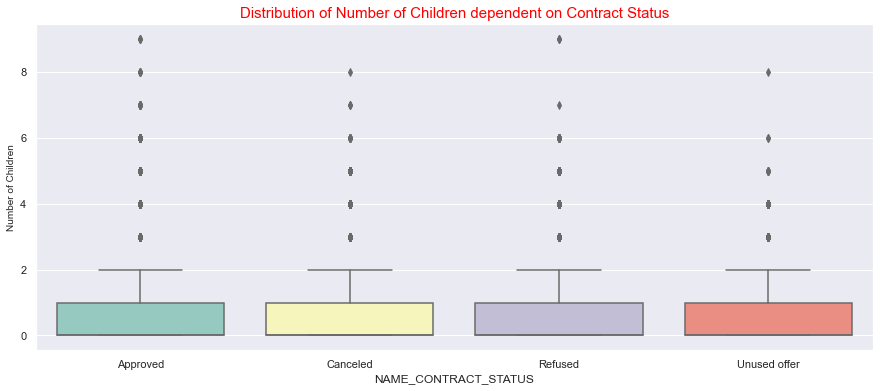

In [122]:
plt.figure(figsize=[15,6])
plt.title('Distribution of Number of Children dependent on Contract Status', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(inp0.NAME_CONTRACT_STATUS,inp0.CNT_CHILDREN, palette="Set3")
plt.ylabel('Number of Children',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

#### Based on the above graphs, it can be concluded that:-
- Maximum applicants have 1 child.
- Number of children of the applicant has no impact on payment difficulty in general; however a very small section of population (if we consider outliers) with many children tends to have payment difficulty.
- Number of children of the applicant has no impact on Approval or Denial of application.

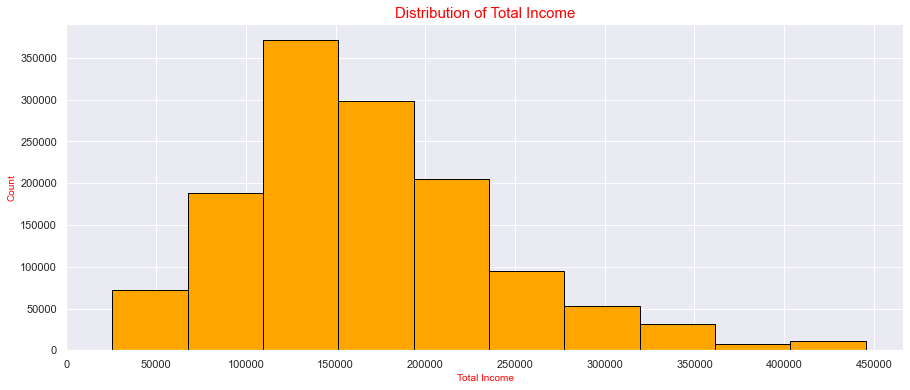

In [123]:
# Let's examine the distribution of INCOME for the applications
plt.figure(figsize=[15,6])
plt.hist(inp0.AMT_INCOME_TOTAL, color='Orange', edgecolor='Black')
plt.title('Distribution of Total Income', fontdict = {'fontsize': 15, 'color': 'Red', 'fontweight' : '500'})
ticks = np.arange(0, 500000, 50000)
plt.xticks(ticks)
plt.xlabel('Total Income',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.ylabel('Count',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.show()

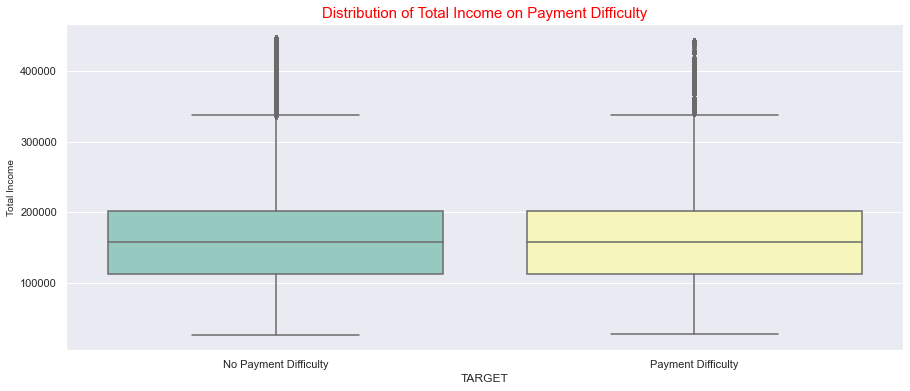

In [124]:
plt.figure(figsize=[15,6])
plt.title('Distribution of Total Income on Payment Difficulty', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.TARGET, y=inp0.AMT_INCOME_TOTAL, palette='Set3')
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.ylabel('Total Income',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

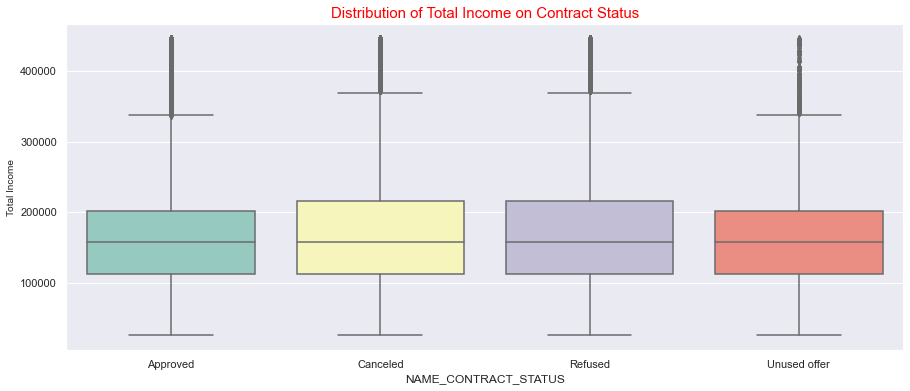

In [125]:
plt.figure(figsize=[15,6])
plt.title('Distribution of Total Income on Contract Status', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.NAME_CONTRACT_STATUS, y=inp0.AMT_INCOME_TOTAL, palette='Set3')
plt.ylabel('Total Income',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

#### Based on the above graphs, it can be concluded that:-
- Payment difficulty is not dependent on Income.
- Maximum population concentration is in Income range of 1L to 1.5L
- Chances of cancelation or refusal are higher for higher income group

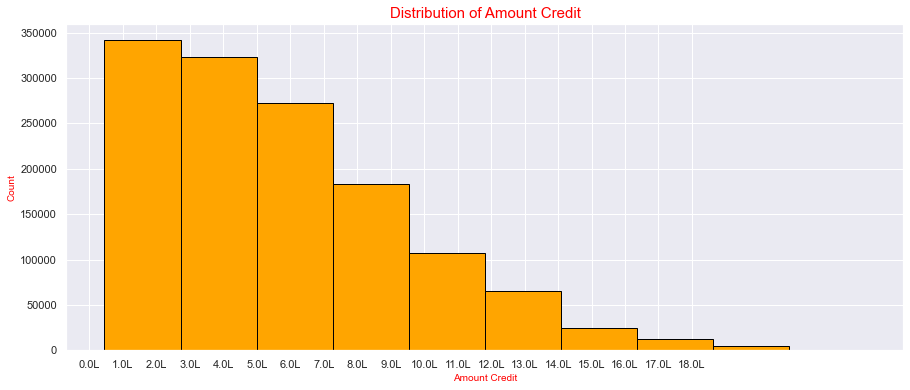

In [126]:
# Checking the distribution of Amount Credit
plt.figure(figsize=[15,6])
plt.hist(inp0.AMT_CREDIT_x, color='Orange', edgecolor='Black')
plt.title('Distribution of Amount Credit', fontdict = {'fontsize': 15, 'color': 'Red', 'fontweight' : '500'})
ticks = np.arange(0, 1900000, 100000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.xticks(ticks, labels)
plt.xlabel('Amount Credit',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.ylabel('Count',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.show()

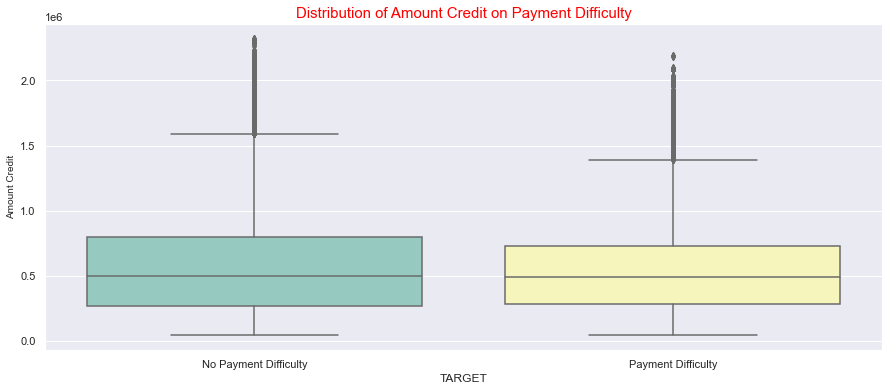

In [127]:
# Analyzing the impact of Amount Credit on Target
plt.figure(figsize=[15,6])
plt.title('Distribution of Amount Credit on Payment Difficulty', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.TARGET, y=inp0.AMT_CREDIT_x, palette="Set3")
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.ylabel('Amount Credit',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

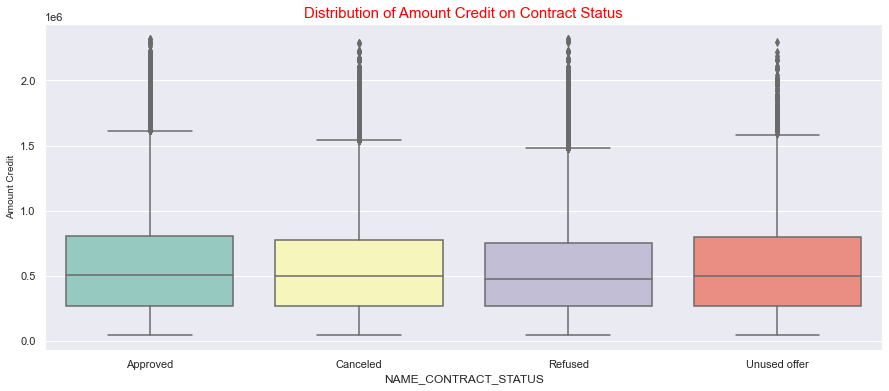

In [128]:
# Analyzing the impact of Amount Credit on Target
plt.figure(figsize=[15,6])
plt.title('Distribution of Amount Credit on Contract Status', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.NAME_CONTRACT_STATUS, y=inp0.AMT_CREDIT_x, palette="Set3")
plt.ylabel('Amount Credit',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

#### Based on the above graphs, it can be concluded that:-
- As the Amount Credited increases; chances of Payment Difficulty are less. In other words; at low amount credit level there is no clear relation with Payment Difficulty but with higher Amount Credit; the payment difficulty eases.
- Field has minimal impact on Application Status.
- Maximum population concentration is in amount range of 1L to 5L

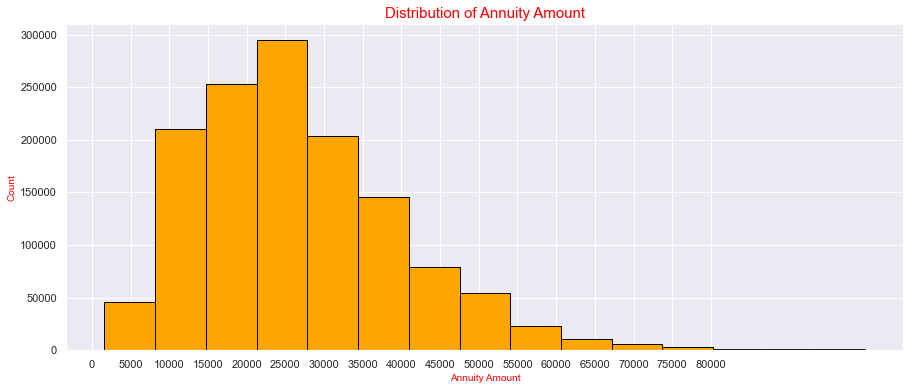

In [129]:
# Checking the distribution of Amount Annuity
plt.figure(figsize=[15,6])
plt.hist(inp0.AMT_ANNUITY_x, color='Orange', edgecolor='Black', bins=15)
plt.title('Distribution of Annuity Amount', fontdict = {'fontsize': 15, 'color': 'Red', 'fontweight' : '500'})
ticks = np.arange(0, 85000, 5000)
plt.xticks(ticks)
plt.xlabel('Annuity Amount',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.ylabel('Count',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.show()

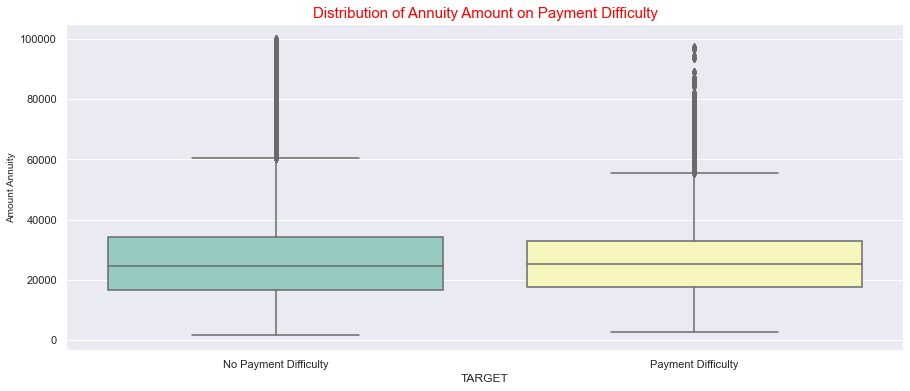

In [130]:
# Analyzing the impact of Annuity Amount on Target
plt.figure(figsize=[15,6])
plt.title('Distribution of Annuity Amount on Payment Difficulty', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.TARGET, y=inp0.AMT_ANNUITY_x, palette="Set3")
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.ylabel('Amount Annuity',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

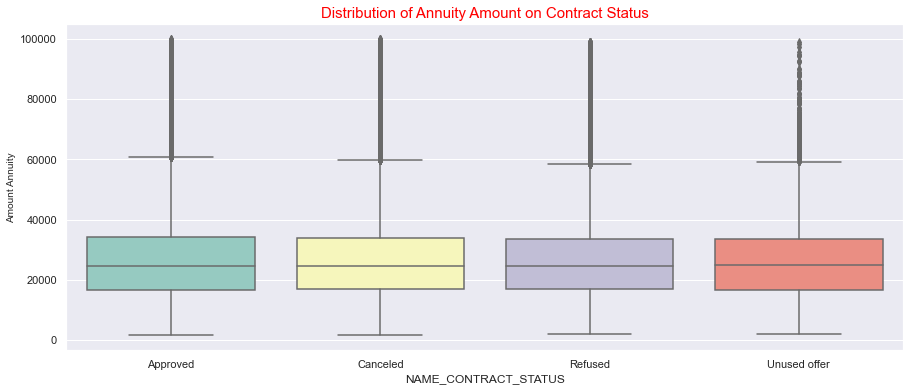

In [131]:
# Analyzing the impact of Annuity Amount on Target
plt.figure(figsize=[15,6])
plt.title('Distribution of Annuity Amount on Contract Status', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.NAME_CONTRACT_STATUS, y=inp0.AMT_ANNUITY_x, palette="Set3")
plt.ylabel('Amount Annuity',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

#### Based on the above graphs, it can be concluded that:-
- Amount Annuity has very slight impact on Payment Difficulty - the range of annuity is more for no payment difficulty.
- Field has minimal impact on Application status.
- Maximum population concentration is in annuity range of 20K to 30K

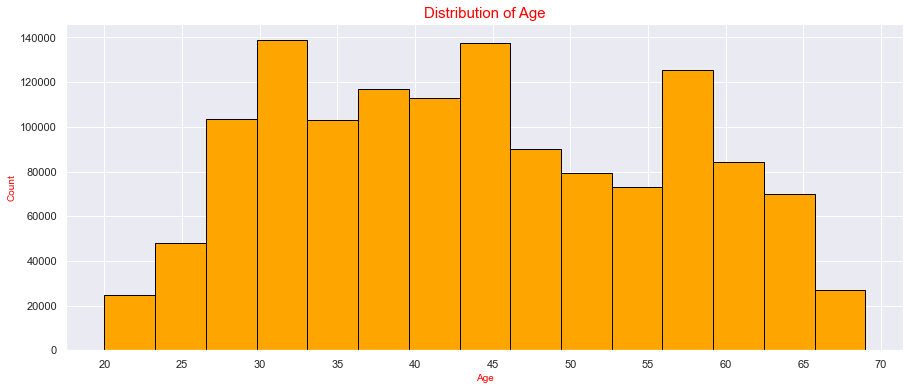

In [132]:
# This is clean data with no outliers. Let's see the distribution of loan application among various age groups.
plt.figure(figsize=[15,6])
plt.hist(inp0.Age, color='Orange', edgecolor='Black', bins=15)
plt.title('Distribution of Age', fontdict = {'fontsize': 15, 'color': 'Red', 'fontweight' : '500'})
plt.xlabel('Age',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
ticks = np.arange(20, 75, 5)
plt.xticks(ticks)
plt.ylabel('Count',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.show()

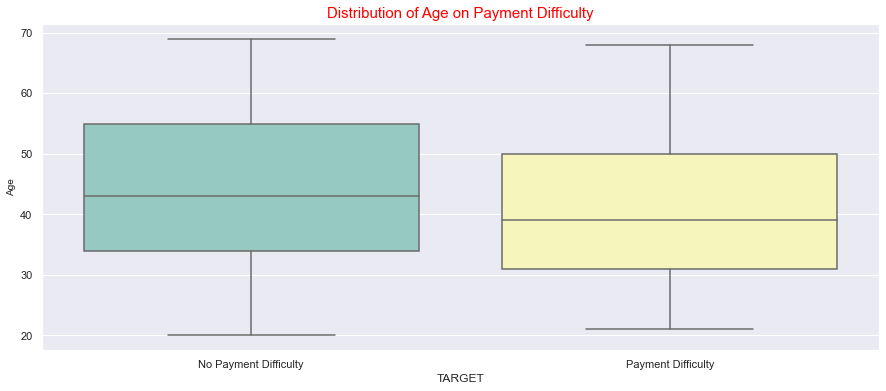

In [133]:
# Analyzing the impact of Age on Target
plt.figure(figsize=[15,6])
plt.title('Distribution of Age on Payment Difficulty', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.TARGET, y=inp0.Age, palette="Set3")
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.ylabel('Age',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

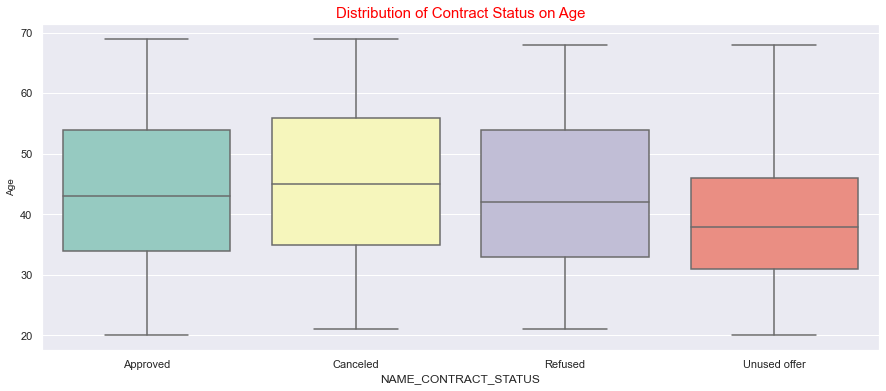

In [134]:
# Analyzing the impact of Age on Target
plt.figure(figsize=[15,6])
plt.title('Distribution of Contract Status on Age', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.NAME_CONTRACT_STATUS, y=inp0.Age, palette="Set3")
plt.ylabel('Age',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

#### Based on the above graphs, it can be concluded that:-
- Age of applicant has a significant impact on Payment Difficulty.
- Applicant with lower age tends to have more payment difficulty as compared to people with higher age.
- It can be said the Payment difficulty reduces as a person matures.
- Approval & Refusal ration is same for various age groups, while cancellation happens in slightly higher age groups. Unused offer is max seen in younger people.
- People in early 30's, Mid 40's and late 50's are more likely to apply for loan - this can be linked to important stages of a person's life - initial settlement, buying a house and education expenses for kids.

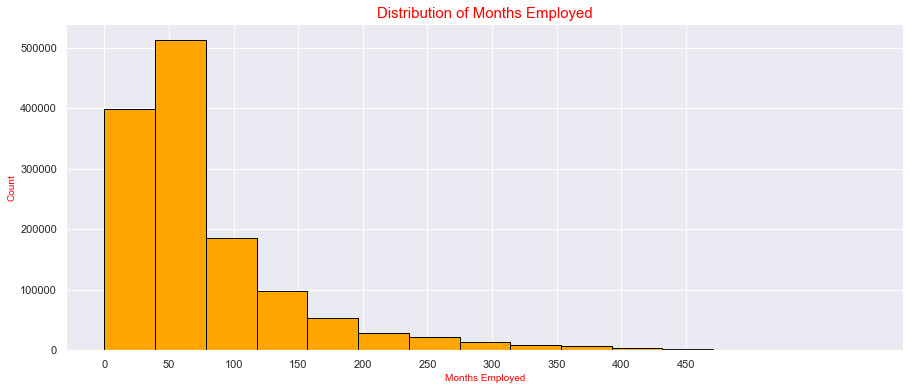

In [135]:
# 600 months actually don't seems to be outlier that needs to be dropped. Retaining all the records.
# Let's see the distribution of loan application among various agr groups.
plt.figure(figsize=[15,6])
plt.hist(inp0.Months_Employed, color='Orange', edgecolor='Black', bins=15)
plt.title('Distribution of Months Employed', fontdict = {'fontsize': 15, 'color': 'Red', 'fontweight' : '500'})
plt.xlabel('Months Employed',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
ticks = np.arange(0, 500, 50)
plt.xticks(ticks)
plt.ylabel('Count',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.show()

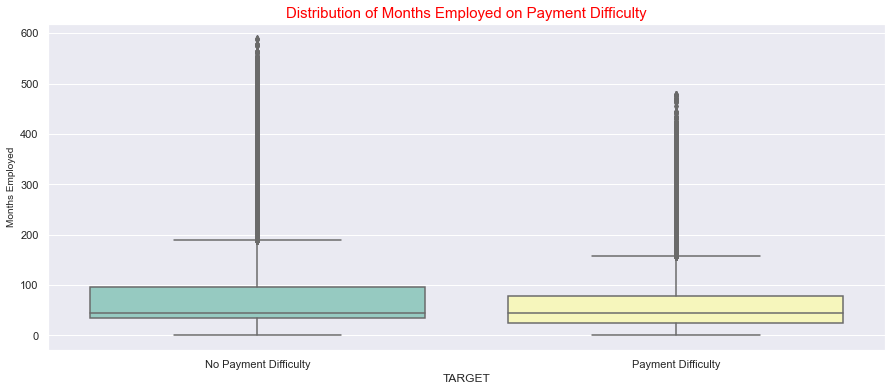

In [136]:
# Analyzing the impact of Months Employed on Target
plt.figure(figsize=[15,6])
plt.title('Distribution of Months Employed on Payment Difficulty', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.TARGET, y=inp0.Months_Employed, palette="Set3")
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.ylabel('Months Employed',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

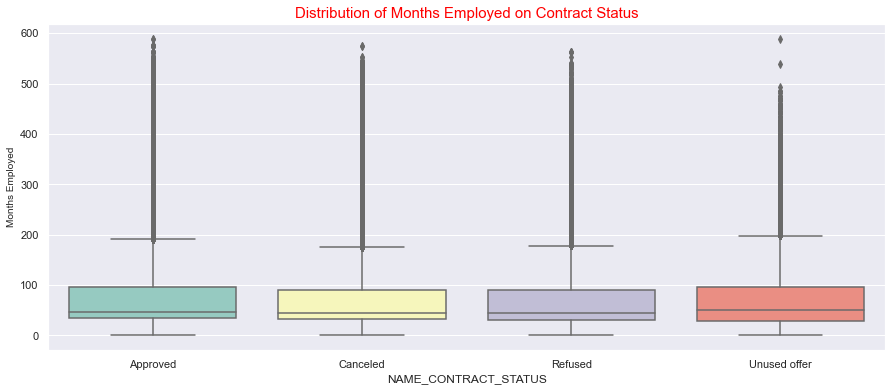

In [137]:
# Analyzing the impact of Months Employed on Target
plt.figure(figsize=[15,6])
plt.title('Distribution of Months Employed on Contract Status', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.NAME_CONTRACT_STATUS, y=inp0.Months_Employed, palette="Set3")
plt.ylabel('Months Employed',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

#### Based on the above graphs, it can be concluded that:-
- Payment difficulty is faced less by applicants with higher number of Months Employed.
- Application status is very less likely to be impacted by the Months Employed.
- Above being said, the median for Months Employed for applicants with & without difficulty remains same.
- Maximum applicants are in range of 45 to 80 months of employment.

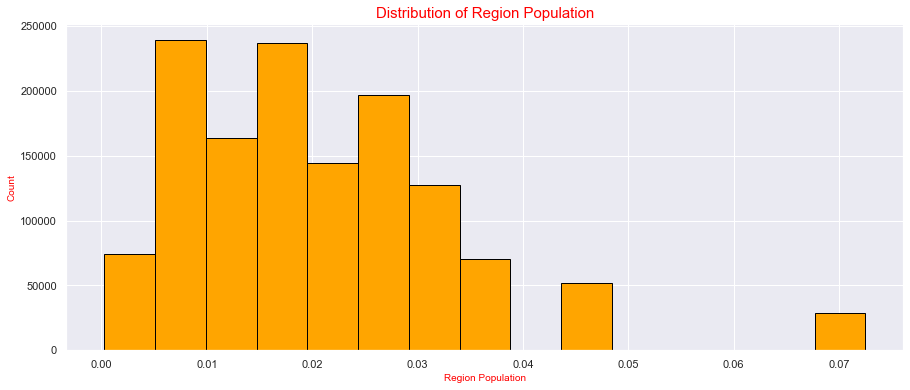

In [138]:
# Let's see the distribution of REGION_POPULATION_RELATIVE.
plt.figure(figsize=[15,6])
plt.hist(inp0.REGION_POPULATION_RELATIVE, color='Orange', edgecolor='Black', bins=15)
plt.title('Distribution of Region Population', fontdict = {'fontsize': 15, 'color': 'Red', 'fontweight' : '500'})
plt.xlabel('Region Population',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.ylabel('Count',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.show()

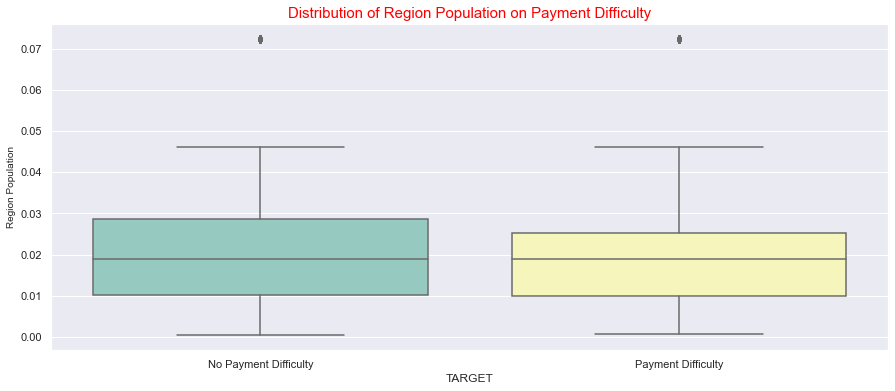

In [139]:
plt.figure(figsize=[15,6])
plt.title('Distribution of Region Population on Payment Difficulty', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.TARGET, y=inp0.REGION_POPULATION_RELATIVE, palette="Set3")
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.ylabel('Region Population',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

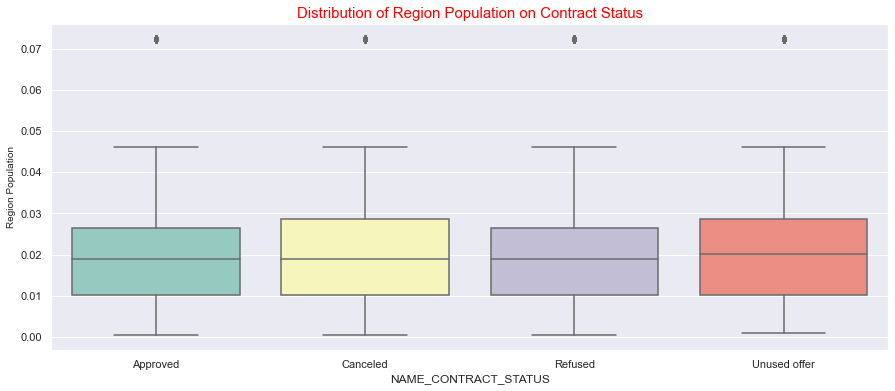

In [140]:
plt.figure(figsize=[15,6])
plt.title('Distribution of Region Population on Contract Status', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.NAME_CONTRACT_STATUS, y=inp0.REGION_POPULATION_RELATIVE, palette="Set3")
plt.ylabel('Region Population',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

#### Based on the above graphs, it can be concluded that:-
- Majority clients for the bank lives in area where population is less.
- People living in higher population regions may face less payment difficulties.
- Cancelation & Unused offeres can be seen more in places with more population.

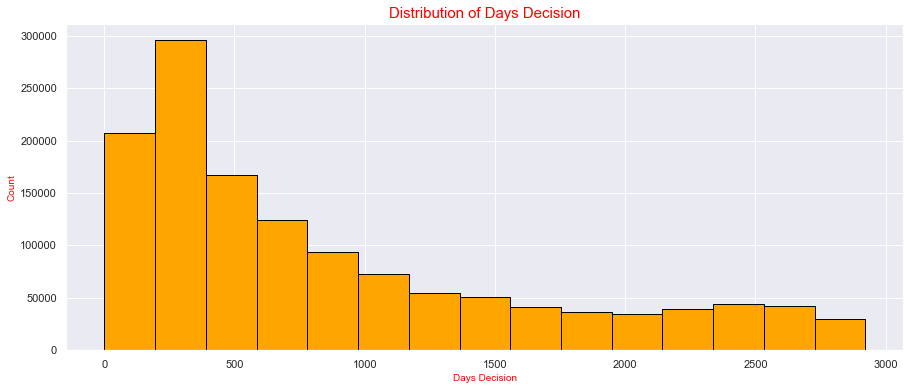

In [141]:
# Let's see the distribution of REGION_POPULATION_RELATIVE.
plt.figure(figsize=[15,6])
plt.hist(inp0.DAYS_DECISION, color='Orange', edgecolor='Black', bins=15)
plt.title('Distribution of Days Decision', fontdict = {'fontsize': 15, 'color': 'Red', 'fontweight' : '500'})
plt.xlabel('Days Decision',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.ylabel('Count',fontdict = {'fontsize': 10, 'color': 'Red', 'fontweight' : '100'})
plt.show()

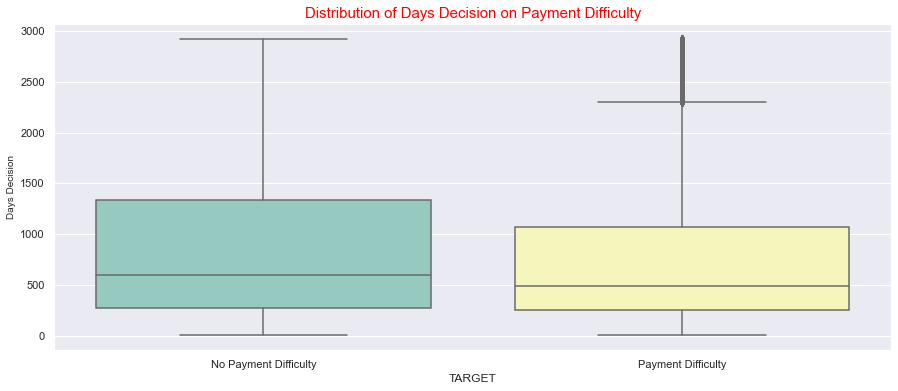

In [142]:
plt.figure(figsize=[15,6])
plt.title('Distribution of Days Decision on Payment Difficulty', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.TARGET, y=inp0.DAYS_DECISION, palette="Set3")
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.ylabel('Days Decision',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

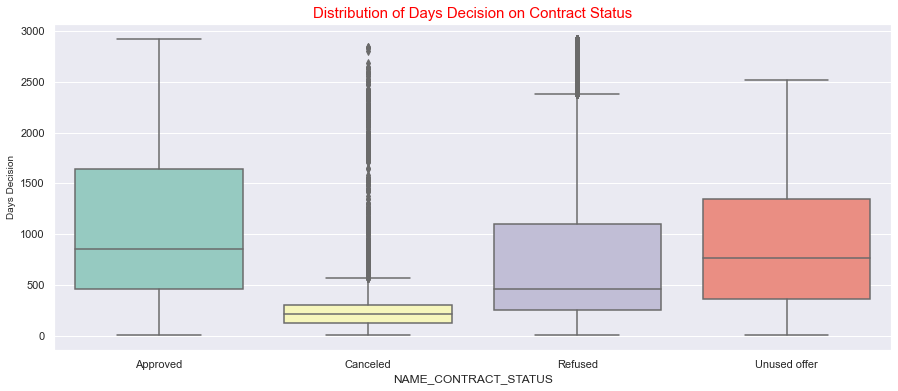

In [143]:
plt.figure(figsize=[15,6])
plt.title('Distribution of Days Decision on Contract Status', fontsize= 15, color = 'Red', fontweight = 100)
sns.boxplot(x=inp0.NAME_CONTRACT_STATUS, y=inp0.DAYS_DECISION, palette="Set3")
plt.ylabel('Days Decision',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

#### Based on the above graphs, it can be concluded that:-
- Days Decision is by far the most conclusive variable.
- Max decisions are done in range of 200 to 300 days.
- Higher the Days Decision, better the chance for no Payment Difficulty.
- Higher the Days Decision, better are the chances of Approval.
- Faster the Days Decision,higher chances of Cancelation.

#### Analysis for Object Columns

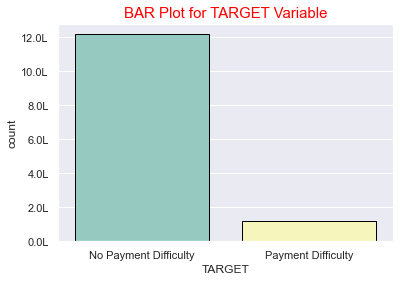

In [144]:
# TARGET Column
plt.title('BAR Plot for TARGET Variable', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(inp0.TARGET, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 1400000, 200000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.show()

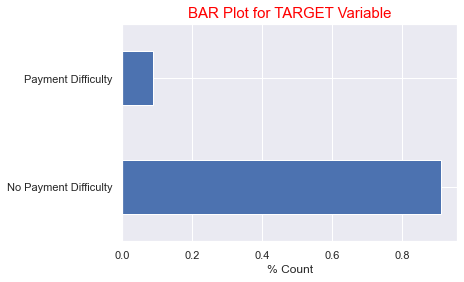

In [145]:
plt.title('BAR Plot for TARGET Variable', fontsize= 15, color = 'Red', fontweight = 100)
inp0.TARGET.value_counts(normalize=True).plot.barh()
plt.xlabel('% Count')
plt.yticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.show()

#### The above plot shows high imbalance in the TARGET column; where most of the application don't have any payment difficulty whereas a small segment of population has payment difficulty.

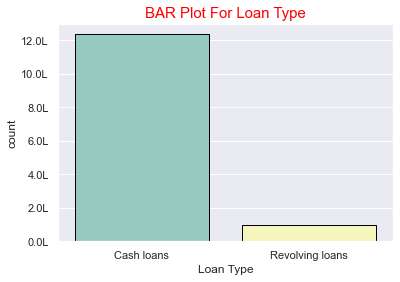

In [146]:
# NAME_CONTRACT_TYPE_x Column

plt.title('BAR Plot For Loan Type', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(inp0.NAME_CONTRACT_TYPE_x, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 1400000, 200000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Loan Type')
plt.show()

#### The above plot shows high imbalance in this column also; where most of the application applied for Cash Loan rather than Revolving Loans.

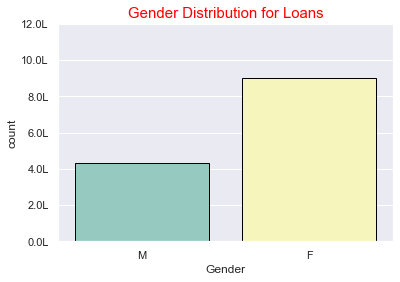

In [147]:
# CODE_GENDER Column

plt.title('Gender Distribution for Loans', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(inp0.CODE_GENDER, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 1400000, 200000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Gender')
plt.show()

#### Based on gender distribution, we can colclude that Females are more likely to apply for loan from the client bank.

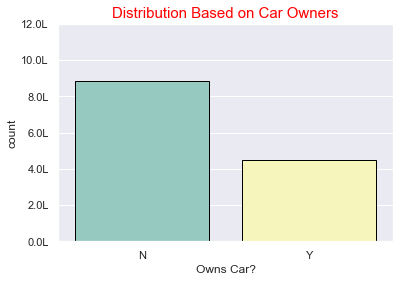

In [148]:
# FLAG_OWN_CAR Column

plt.title('Distribution Based on Car Owners', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(inp0.FLAG_OWN_CAR, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 1400000, 200000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Owns Car?')
plt.show()



#### So a person not owning a car is more likely to apply for loan in the bank.

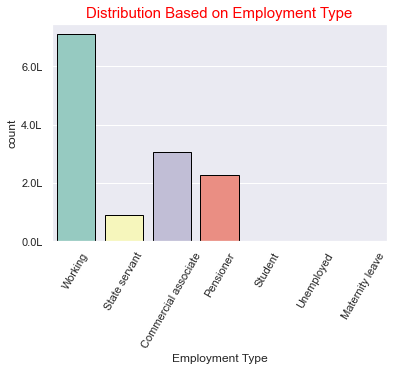

In [149]:
plt.title('Distribution Based on Employment Type', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(inp0.NAME_INCOME_TYPE, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 800000, 200000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=60)
plt.xlabel('Employment Type')
plt.show()

#### Hence, working people are more likely to apply for the loan

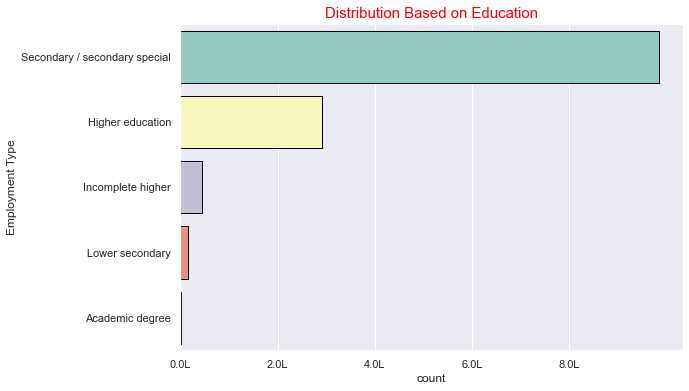

In [150]:
plt.figure(figsize=[9,6])
plt.title('Distribution Based on Education', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(y=inp0.NAME_EDUCATION_TYPE, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 1000000, 200000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.xticks(ticks, labels)
plt.ylabel('Employment Type')
plt.show()

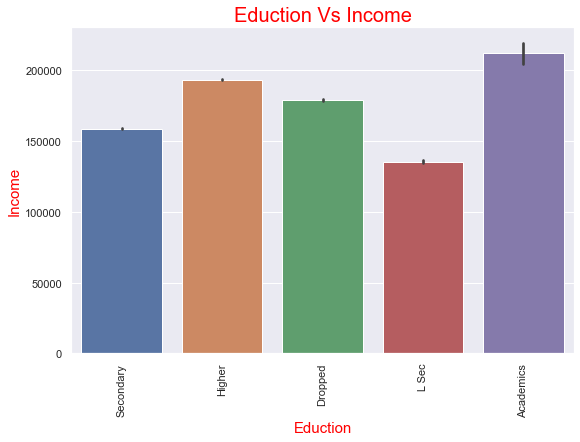

In [151]:
# Comparison between Education & Income
plt.figure(figsize=[9,6])
sns.barplot(inp0.NAME_EDUCATION_TYPE, inp0.AMT_INCOME_TOTAL)
plt.title('Eduction Vs Income', fontsize= 20, color = 'Red', fontweight = 400)
plt.xlabel('Eduction', fontsize= 15, color = 'Red', fontweight = 100)
plt.ylabel('Income', fontsize= 15, color = 'Red', fontweight = 100)
plt.xticks((0,1,2,3,4),['Secondary', 'Higher', 'Dropped', 'L Sec', 'Academics'])
plt.xticks(rotation=90)
plt.show()

#### It can be inferred from the above plot that:-
- People with Secondary Education are more likely to apply for Loan.
- People with Academics Degree have the highest income and are very less likely to apply for loan.
- People with Secondary Education are the best targets for the bank.

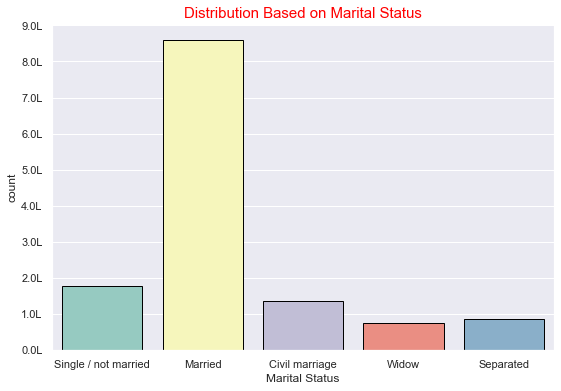

In [152]:
# NAME_FAMILY_STATUS column
plt.figure(figsize=[9,6])
plt.title('Distribution Based on Marital Status', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(inp0.NAME_FAMILY_STATUS, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 1000000, 100000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Marital Status')
plt.show()

#### Its very clear that Married people are most likely to apply for Loan

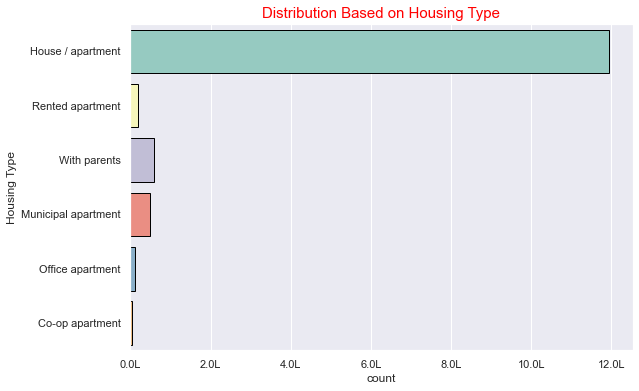

In [153]:
# NAME_HOUSING_TYPE Column
plt.figure(figsize=[9,6])
plt.title('Distribution Based on Housing Type', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(y=inp0.NAME_HOUSING_TYPE, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 1400000, 200000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.xticks(ticks, labels)
plt.ylabel('Housing Type')
plt.show()

#### Based on the above plot, people staying in House/ apartment are most likely to apply for loan

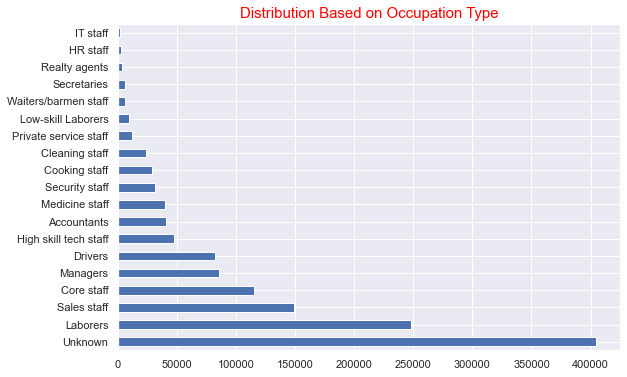

In [154]:
# OCCUPATION_TYPE Column

plt.figure(figsize=[9,6])
plt.title('Distribution Based on Occupation Type', fontsize= 15, color = 'Red', fontweight = 100)
inp0.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

#### No inference can be based on the above plot since the occupation type of max population is not known.

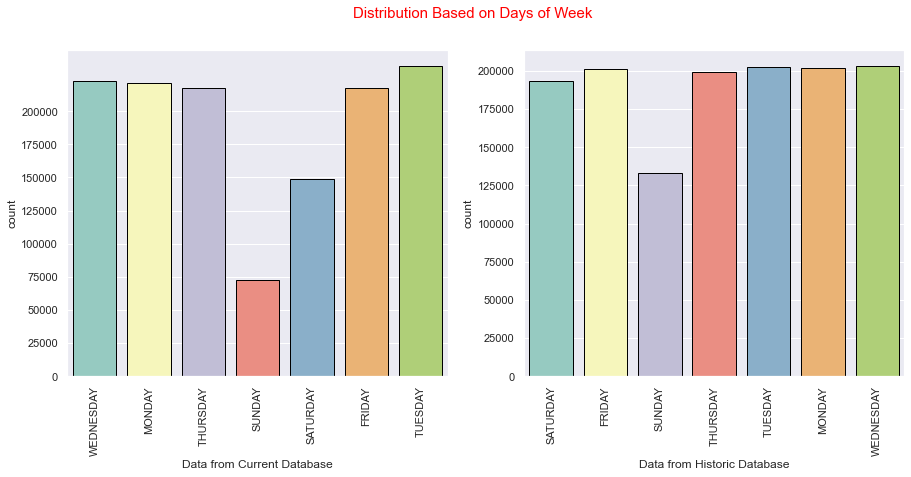

In [155]:
# WEEKDAY_APPR_PROCESS_START_x column
plt.figure(figsize=[15,6])
plt.suptitle('Distribution Based on Days of Week', fontsize= 15, color = 'Red', fontweight = 100)
plt.subplot(1,2,1)
sns.countplot(inp0.WEEKDAY_APPR_PROCESS_START_x, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 225000, 25000)
plt.yticks(ticks)
plt.xticks(rotation=90)
plt.xlabel('Data from Current Database')
plt.subplot(1,2,2)
sns.countplot(inp0.WEEKDAY_APPR_PROCESS_START_y, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 225000, 25000)
plt.yticks(ticks)
plt.xticks(rotation=90)
plt.xlabel('Data from Historic Database')
plt.show()

#### The following can be inferred here:-
- On weekends (Saturday & Sunday), the rate of application is very less as compared to Weekdays. 
- On weekdays, there is no clear preffered day but Tuesdays have seen slight more applications as compared to other days.
- On comparing the historical & current loan data it can be seen that earlier applications were processed on Saturdays almost atpar with other days. 
- Sundays used to see less number of applications; but was busier as compared to the recent data.

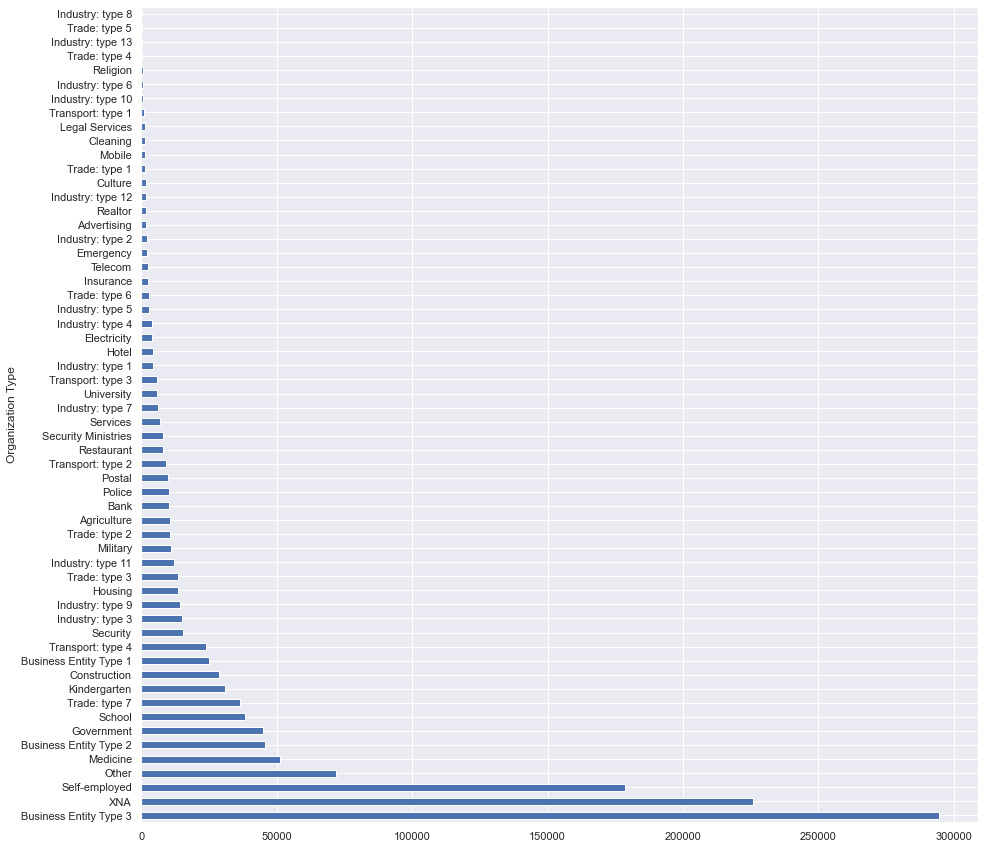

In [156]:
# ORGANIZATION_TYPE Column
plt.figure(figsize=[15,15])
inp0.ORGANIZATION_TYPE.value_counts().plot.barh()
plt.ylabel('Organization Type')
plt.show()

#### No clear inference from the above plot because there are many application with Organization as XNA or Other. Also Meaning of Business Entity Type is not clear to decide exact trend.

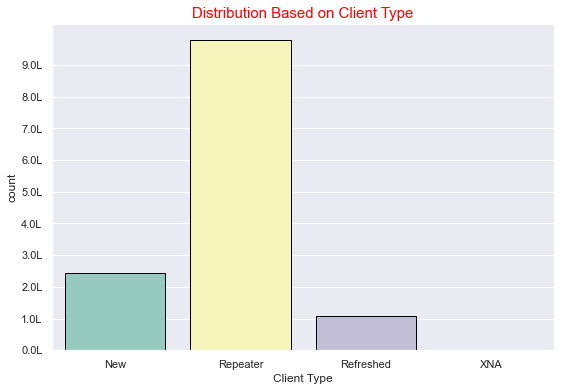

In [157]:
# NAME_CLIENT_TYPE column
plt.figure(figsize=[9,6])
plt.title('Distribution Based on Client Type', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(inp0.NAME_CLIENT_TYPE, palette="Set3", edgecolor='Black')
ticks = np.arange(0, 1000000, 100000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Client Type')
plt.show()

#### This seems to be very important inference. The existing clients tends to apply for new loans again. In comparison, the new applicants are quite less.

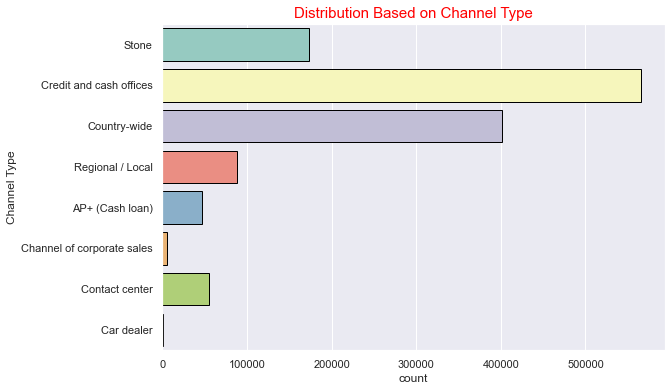

In [158]:
# CHANNEL_TYPE Column
plt.figure(figsize=[9,6])
plt.title('Distribution Based on Channel Type', fontsize= 15, color = 'Red', fontweight = 100)
sns.countplot(y=inp0.CHANNEL_TYPE, palette="Set3", edgecolor='Black')
plt.ylabel('Channel Type')
plt.show()

#### Based on the above plot, it can be concluded that Credit and Cash offices are the most effective channels.

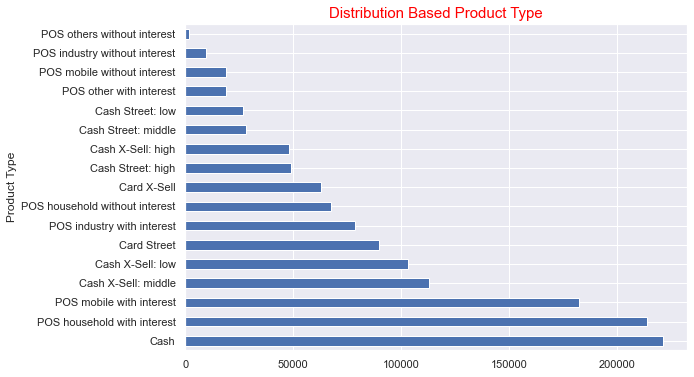

In [159]:
# PRODUCT_COMBINATION column
plt.figure(figsize=[9,6])
plt.title('Distribution Based Product Type', fontsize= 15, color = 'Red', fontweight = 100)
inp0.PRODUCT_COMBINATION.value_counts().plot.barh()
plt.ylabel('Product Type')
plt.show()

#### As was concluded earlier based on stats from Contract Type column from the current application; Cash Loan was the most sort after loan category historically also.

#### Additional Bivariate analysis between Categorical Vs numeric variables to see relations

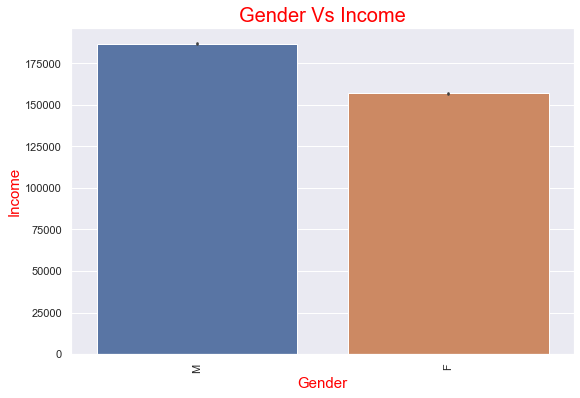

In [160]:
# Relation in income & gender
plt.figure(figsize=[9,6])
sns.barplot(inp0.CODE_GENDER, inp0.AMT_INCOME_TOTAL)
plt.title('Gender Vs Income', fontsize= 20, color = 'Red', fontweight = 400)
plt.xlabel('Gender', fontsize= 15, color = 'Red', fontweight = 100)
plt.ylabel('Income', fontsize= 15, color = 'Red', fontweight = 100)
plt.xticks(rotation=90)
plt.show()

#### Males are drawing higher income as compared to Females but the gap is not very high.

### Step 7 : Multivariate Analysis
- Finding Correlation between numeric variables

In [161]:
inp0.iloc[:,num].corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,Age,Months_Employed,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,DAYS_DECISION,SELLERPLACE_AREA
CNT_CHILDREN,1.000000,0.015207,0.003140,0.028628,-0.000887,-0.025022,-0.362485,-0.020806,-0.189819,0.011234,0.879761,0.029213,0.027785,-0.001852,-0.008582,0.011683,0.014916,0.030987,0.077817,0.070992,-0.024637,0.020154,0.001166,0.019547,-0.000492,-0.010340,-0.036110,-0.036623,0.015770,0.012960,0.000863
AMT_INCOME_TOTAL,0.015207,1.000000,0.362438,0.441098,0.364256,0.153392,-0.060285,0.064679,-0.058793,-0.035098,0.021723,-0.195254,-0.214255,0.086049,0.067514,0.141625,0.130107,0.010332,0.027593,0.030789,0.143970,-0.015034,-0.024430,-0.014949,-0.024487,0.061135,0.147283,0.147082,0.094607,-0.014982,0.005127
AMT_CREDIT_x,0.003140,0.362438,1.000000,0.761231,0.985729,0.076441,0.047382,0.093138,-0.006307,-0.007329,0.064117,-0.077199,-0.086106,0.043799,0.015637,0.039536,0.041997,-0.025635,-0.012937,0.004249,0.108973,0.008643,-0.016446,0.008680,-0.019545,0.085849,0.110500,0.108972,0.042388,0.060260,0.004124
AMT_ANNUITY_x,0.028628,0.441098,0.761231,1.000000,0.763649,0.092422,-0.033055,0.062285,-0.044369,-0.032890,0.085516,-0.101790,-0.115792,0.047217,0.037184,0.071647,0.066603,-0.001404,0.010271,0.016366,0.099033,-0.003666,-0.018222,-0.003261,-0.019423,0.059721,0.102710,0.098893,0.055872,0.034106,0.005383
AMT_GOODS_PRICE_x,-0.000887,0.364256,0.985729,0.763649,1.000000,0.079573,0.045843,0.094534,-0.008482,-0.004617,0.062218,-0.078728,-0.086646,0.053444,0.017001,0.040352,0.042261,-0.026425,-0.014509,0.003026,0.116437,0.010409,-0.016582,0.010402,-0.019588,0.090088,0.112024,0.109034,0.049217,0.061761,0.005219
REGION_POPULATION_RELATIVE,-0.025022,0.153392,0.076441,0.092422,0.079573,1.000000,0.043073,0.004594,0.055135,0.007834,-0.022812,-0.505353,-0.504704,0.152857,-0.006723,0.047134,0.069973,-0.050349,-0.038452,-0.010664,0.184796,-0.003230,0.010002,-0.002690,0.006983,0.051489,0.039528,0.039902,0.148659,0.027830,0.000759
Age,-0.362485,-0.060285,0.047382,-0.033055,0.045843,0.043073,1.000000,0.125308,0.329559,0.271062,-0.326266,-0.023430,-0.021649,-0.085836,-0.055934,-0.090260,-0.068488,-0.178010,-0.244309,-0.164323,0.091746,-0.014885,-0.001144,-0.014357,-0.003182,0.092383,0.081863,0.079886,-0.124143,0.027031,-0.005635
Months_Employed,-0.020806,0.064679,0.093138,0.062285,0.094534,0.004594,0.125308,1.000000,0.099777,0.009939,0.004829,-0.000377,-0.001932,0.003080,-0.042308,-0.059522,-0.045662,-0.088199,-0.072990,-0.032498,0.080819,0.002278,-0.009364,0.002285,-0.011887,0.127467,0.040805,0.042702,-0.005227,0.069945,-0.001294
DAYS_REGISTRATION,-0.189819,-0.058793,-0.006307,-0.044369,-0.008482,0.055135,0.329559,0.099777,1.000000,0.104395,-0.184097,-0.085241,-0.078231,0.012537,-0.029075,-0.036137,-0.027108,-0.065771,-0.102139,-0.075467,0.065010,-0.014505,-0.007709,-0.014387,-0.007784,0.059617,0.015193,0.014840,0.000226,0.022473,-0.003472
DAYS_ID_PUBLISH,0.011234,-0.035098,-0.007329,-0.032890,-0.004617,0.007834,0.271062,0.009939,0.104395,1.000000,-0.003959,0.001462,0.003582,-0.032420,-0.031454,-0.050270,-0.038437,-0.071637,-0.105829,-0.071036,0.044016,0.011195,-0.001485,0.011523,-0.003054,0.084399,0.012618,0.010819,-0.043528,0.050065,-0.001313


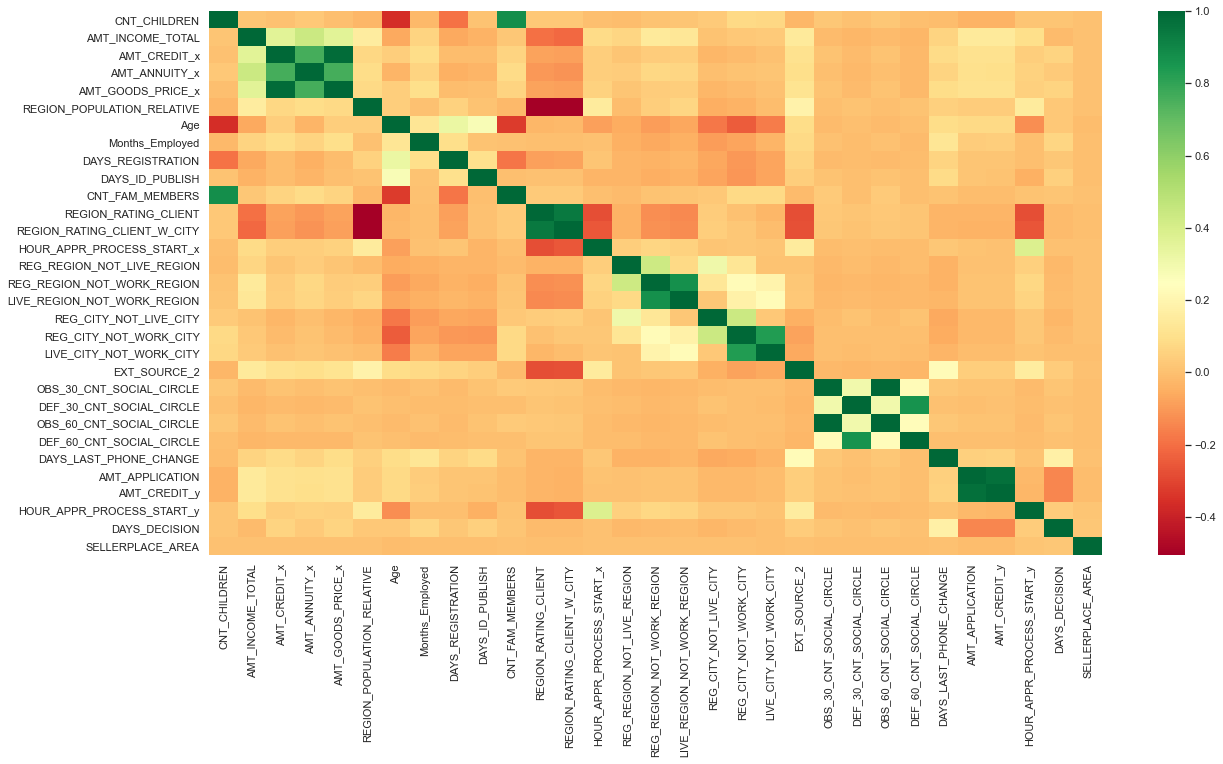

In [162]:
plt.figure(figsize=[20,10])
sns.heatmap(inp0.iloc[:,num].corr(), cmap='RdYlGn')
plt.show()

#### From the above heat map; there don't seems to be relationship among most of the variables. The following green areas of the above map will be examined further.
- Relationship between OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE.
- Relationship between AMT_APPLICATION, AMT_CREDIT_y
- Relationship between AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE
- Relationship between CNT_FAM_MEMBERS and CNT_CHILDREN (This don't need further investigation as we know from previous analysis that the field do not impact TARGET or Previous application Status

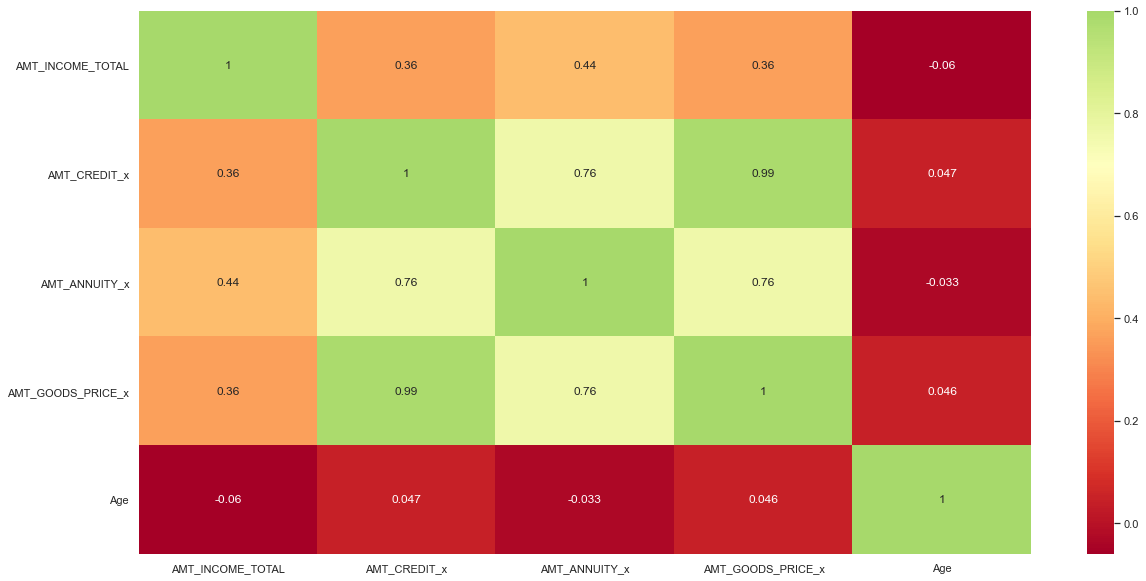

In [163]:
plt.figure(figsize=[20,10])
sns.heatmap(inp0[['AMT_INCOME_TOTAL', 
                 'AMT_CREDIT_x',
                 'AMT_ANNUITY_x',
                 'AMT_GOODS_PRICE_x',
                 'Age'
                  ]].corr(), annot=True, cmap='RdYlGn', center=.7)
plt.show()

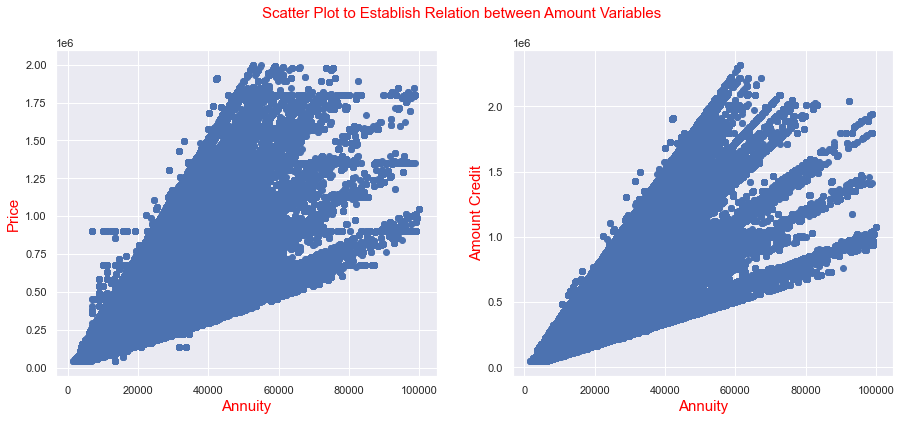

In [164]:
# Check linearity of variables showing high coorelation
plt.figure(figsize=[15,6])
plt.suptitle('Scatter Plot to Establish Relation between Amount Variables', fontsize= 15, color = 'Red', fontweight = 100)
plt.subplot(1,2,1)
plt.scatter(inp0.AMT_ANNUITY_x, inp0.AMT_GOODS_PRICE_x)
plt.xlabel('Annuity', fontsize= 15, color = 'Red', fontweight = 100)
plt.ylabel('Price', fontsize= 15, color = 'Red', fontweight = 100)

plt.subplot(1,2,2)
plt.scatter(inp0.AMT_ANNUITY_x, inp0.AMT_CREDIT_x)
plt.xlabel('Annuity', fontsize= 15, color = 'Red', fontweight = 100)
plt.ylabel('Amount Credit', fontsize= 15, color = 'Red', fontweight = 100)

plt.show()

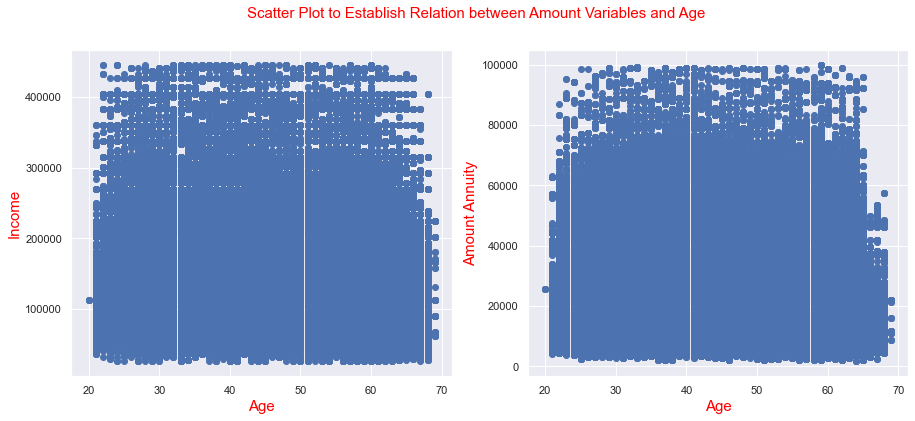

In [165]:
# Age has negative corelation with amount variables. Let's try to reconfirm if there is a strong relation using Scatter plot.
plt.figure(figsize=[15,6])
plt.suptitle('Scatter Plot to Establish Relation between Amount Variables and Age', fontsize= 15, color = 'Red', fontweight = 100)
plt.subplot(1,2,1)
plt.scatter(inp0.Age, inp0.AMT_INCOME_TOTAL)
plt.xlabel('Age', fontsize= 15, color = 'Red', fontweight = 100)
plt.ylabel('Income', fontsize= 15, color = 'Red', fontweight = 100)

plt.subplot(1,2,2)
plt.scatter(inp0.Age, inp0.AMT_ANNUITY_x)
plt.xlabel('Age', fontsize= 15, color = 'Red', fontweight = 100)
plt.ylabel('Amount Annuity', fontsize= 15, color = 'Red', fontweight = 100)

plt.show()

#### From the above plots, it can be inferred that Amount Credit, Amount Annuity & Amount Goods Price has a high positive correlation with each other. These fields however have week correlation with Age of applicant or Days Decision. The scatter plot confirms the same (lenear relation in variables).
#### Also, it looked that Income & Annuity has negative correlation with Age, but the relation is actually scattered.

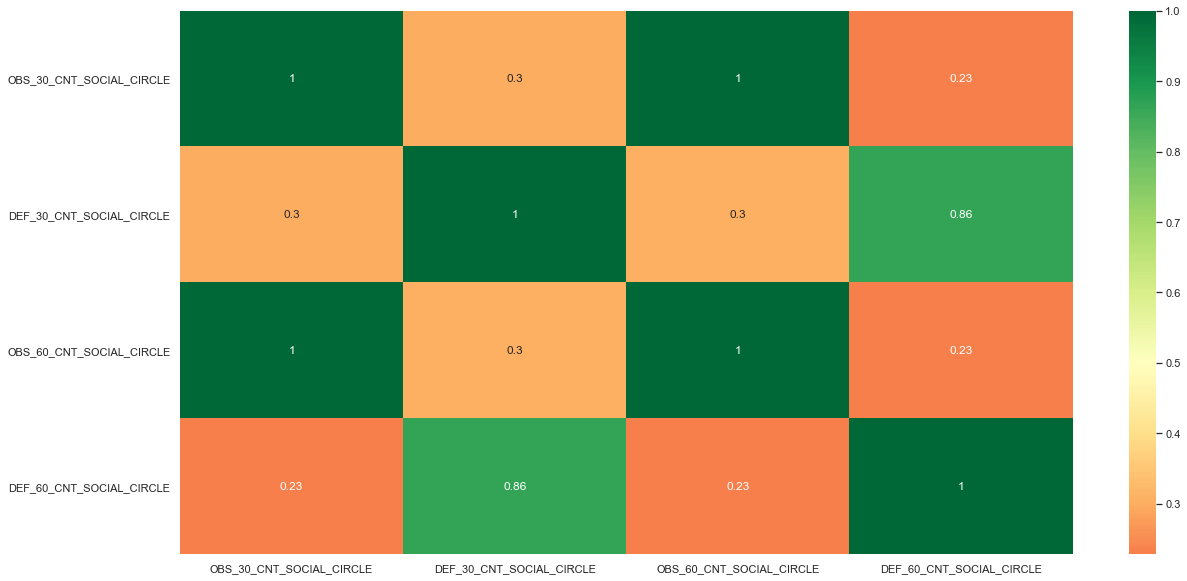

In [166]:
# Now let's study various Social Circle related variables and their impact on payment difficulty
plt.figure(figsize=[20,10])
sns.heatmap(inp0[['OBS_30_CNT_SOCIAL_CIRCLE', 
                  'DEF_30_CNT_SOCIAL_CIRCLE', 
                  'OBS_60_CNT_SOCIAL_CIRCLE', 
                  'DEF_60_CNT_SOCIAL_CIRCLE'
                  ]].corr(), annot=True, cmap='RdYlGn', center=0.5)
plt.show()

- As thought earlier, the correlations between OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE is very strong. 
- DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE which has a strong positive correlation
- OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE has a correlation of 1.

#### Since the columns related to 30DPD & 60DPD in sorrounding are highly coorelated; lets see if they impact TARGET variable.

In [167]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0    1171852
1.0     130280
2.0      24889
3.0       6246
4.0       1555
5.0        278
6.0         66
7.0          4
8.0          2
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [168]:
temp = inp0[inp0.DEF_30_CNT_SOCIAL_CIRCLE > 4]

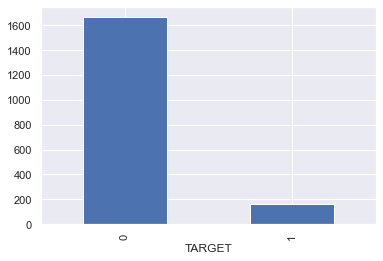

In [169]:
temp.groupby('TARGET')['DEF_30_CNT_SOCIAL_CIRCLE'].sum().plot.bar()
plt.show()

In [170]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     691487
1.0     209406
2.0     131304
3.0      91612
4.0      64565
5.0      44801
6.0      31395
7.0      21951
8.0      14614
9.0      10652
10.0      7269
11.0      4541
12.0      3894
13.0      2338
14.0      1463
15.0      1056
16.0       831
17.0       622
19.0       332
18.0       274
20.0       188
21.0       160
22.0       153
25.0        76
23.0        55
24.0        42
27.0        40
29.0        19
26.0        15
30.0        13
47.0         4
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [171]:
# Impact of Social circle on Target at a higher value of social circle
temp = inp0[inp0.OBS_30_CNT_SOCIAL_CIRCLE > 10]

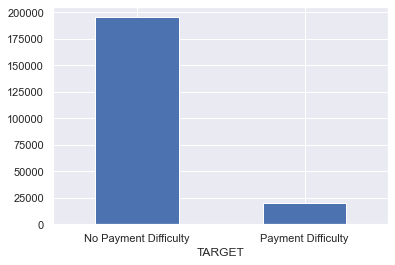

In [172]:
# Impact of Social circle on Target at a higher value of social circle
temp.groupby('TARGET')['OBS_30_CNT_SOCIAL_CIRCLE'].sum().plot.bar()
plt.xticks((0,1),['No Payment Difficulty', 'Payment Difficulty'])
plt.xticks(rotation=0)
plt.show()

#### Though the variables related to 30 & 60 DPD are highly influenced by the sorrounding; there is no evedence that the client bank got impacted by the customers living in such areas.

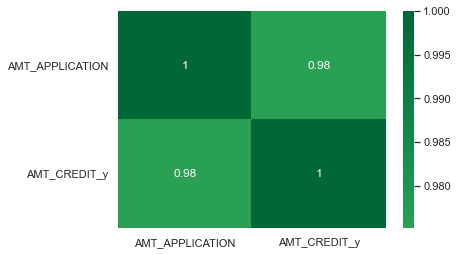

In [173]:
# Relation in previous Application amount & credit amount
sns.heatmap(inp0[['AMT_APPLICATION','AMT_CREDIT_y']].corr(), annot=True, cmap='RdYlGn', center=0.9)
plt.yticks(rotation=0)
plt.show()

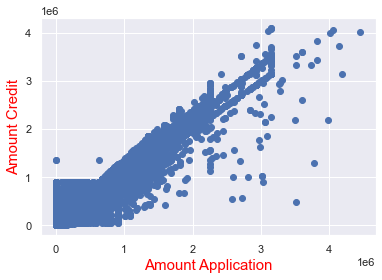

In [174]:
# Additional check to see the linearity in variables
plt.scatter(inp0.AMT_APPLICATION, inp0.AMT_CREDIT_y)
plt.xlabel('Amount Application', fontsize= 15, color = 'Red', fontweight = 100)
plt.ylabel('Amount Credit', fontsize= 15, color = 'Red', fontweight = 100)
plt.show()

#### There is a very high correlation between the historic data for Amount application & Amount Credited. This means that bank normally approves the loan for the requested amount.